# **Lazada Review Data Analysis**

Hieremias Kevin Juwantoro JCDS 2202

This notebook serves as the **Purwadhika fifth project** of Job Connector-Data Science and Machine Learning program at Purwadhika Start-up and Coding School.

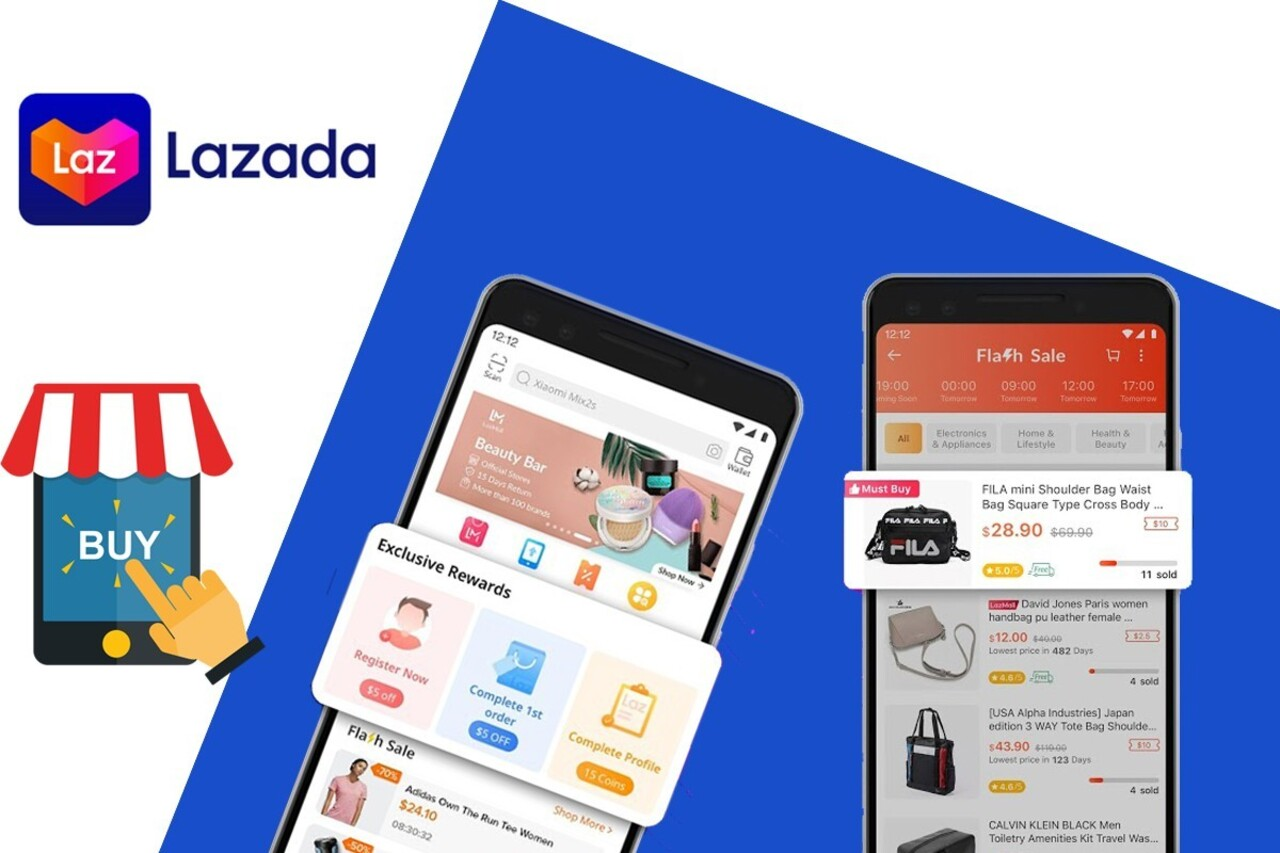

## **BACKGROUND**

Lazada is an international e-commerce company and one of the largest e-commerce operators in Southeast Asia. It was founded in 2012 by Maximilian Bittner with the intention of establishing an Amazon-like business model in the region. Lazada operates in six countries: Indonesia, Malaysia, the Philippines, Singapore, Thailand, and Vietnam. It offers a wide range of products across various categories, such as fashion, electronics, home and living, mother and baby, and health and beauty. It also has a virtual mall called LazMall, where consumers can shop from leading international and local brands.

Lazada has a marketplace platform that allows third-party retailers to sell their products on its website and mobile apps. It also has a cross-border business that features homegrown brands and sellers from markets such as China, Hong Kong, Korea, Japan, the United States, and Europe. Lazada provides a full suite of services to its sellers, such as secure payment options, customer care support, marketing analytics, and logistics network.

Lazada is backed by Alibaba Group, which acquired a controlling stake in the company in 2016. Alibaba’s technology infrastructure and expertise have helped Lazada to enhance its customer experience, expand its product assortment, and improve its operational efficiency. Lazada aims to serve 300 million customers by 2030 and become the leading online shopping and selling destination in Southeast Asia.



## **Problem Statement**

<img src = 'https://25174313.fs1.hubspotusercontent-eu1.net/hub/25174313/hubfs/LAZADA_WALLET_ACTIVATION.png?width=639&height=467&name=LAZADA_WALLET_ACTIVATION.png'>

**Analyze negative customer reviews on the Lazada platform** to understand the prevalent issues and root causes impacting product dissatisfaction. Utilizing the columns such as reviewContent and reviewTitle, employ Natural Language Processing (NLP) techniques to identify common themes and keywords in negative reviews. 

Explore the distribution of negative reviews across product categories (category_x) and brands (brandName), while examining factors such as product pricing (price), delivery times (retrievedDate_x), and review ratings (rating) to uncover the contributors to customer dissatisfaction. 

Identify specific keywords in negative reviews, prioritize areas for improvement based on customer engagement metrics (likeCount, upVotes, downVotes, helpful), and consider additional factors such as total reviews (totalReviews), relevance scores (relevanceScore), purchase dates (boughtDate), customer types (clientType), and temporal trends (retrievedDate_y) to enhance the overall product quality, customer satisfaction, and user experience on the Lazada platform.

1. What are the common themes or issues mentioned in negative customer reviews?

2. Are there specific product categories or brands consistently receiving negative feedback?

3. How do factors such as product pricing, delivery issues, or customer service contribute to negative reviews?

4. Can we identify patterns in customer complaints and use them to prioritize improvements?

## **Goals**

<img src = 'https://share.trustpilot.com/images/company-rating?locale=en-GB&businessUnitId=5494d49300006400057c44c4'>

**Investigate and understand the root causes of negative customer reviews on the Lazada platform to improve product quality, customer satisfaction, and overall user experience.**

## **Column Description**

| Column           | Description                                       |
|------------------|---------------------------------------------------|
| `itemId`         | Unique identifier for each item                   |
| `category_x`     | Product category identifier                       |
| `name_x`         | Identifier for the product name                    |
| `brandName`      | Brand name of the product                         |
| `url`            | URL for the product on Lazada                      |
| `price`          | Price of the product                              |
| `averageRating`  | Average rating of the product                      |
| `totalReviews`   | Total number of reviews for the product           |
| `retrievedDate_x`| Date of data retrieval for product information    |
| `category_y`     | Product category identifier in reviews            |
| `name_y`         | Identifier for the product name in reviews         |
| `rating`         | Rating given in the review                        |
| `originalRating` | Original rating given in the review               |
| `reviewTitle`    | Title of the review                               |
| `reviewContent`  | Content of the review                             |
| `likeCount`      | Number of likes for the review                    |
| `upVotes`        | Number of upvotes for the review                  |
| `downVotes`      | Number of downvotes for the review                |
| `helpful`        | Indicates if the review was marked as helpful     |
| `relevanceScore` | Relevance score of the review                     |
| `boughtDate`     | Date of purchase of the product                   |
| `clientType`     | Type of client (customer)                         |
| `retrievedDate_y`| Date of data retrieval for reviews                |


## **Preparation Import Libraries**

The preparation involves importing the required libraries and preparing the dataset.

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_colwidth', None)

## **Load Dataset**

Importing Dataset and Viewing the top and bottom 5 rows of data

In [2]:
#load the dataset 
df1 = pd.read_csv('20191002-items.csv')
df2 = pd.read_csv('20191002-reviews.csv')

# Merge the datasets based on 'itemId'
df = pd.merge(df1, df2, on='itemId', how='inner')  # 'how' parameter specifies the type of join

# Display the merged dataframe
display(df.head(), df.tail())

,itemId,category_x,name_x,brandName,url,price,averageRating,totalReviews,retrievedDate_x,category_y,...,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate_y
0,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free Bracket TV - Hitam - Khusus Jabodetabek",Toshiba,https://www.lazada.co.id/products/toshiba-smart-hd-led-tv-32-32l5650vj-free-bracket-tv-hitam-khusus-jabodetabek-i100002528-s100003593.html?search=1,2499000,4,8,2019-10-02,beli-harddisk-eksternal,...,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,09 Apr 2019,androidApp,2019-10-02
1,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free Bracket TV - Hitam - Khusus Jabodetabek",Toshiba,https://www.lazada.co.id/products/toshiba-smart-hd-led-tv-32-32l5650vj-free-bracket-tv-hitam-khusus-jabodetabek-i100002528-s100003593.html?search=1,2499000,4,8,2019-10-02,beli-harddisk-eksternal,...,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24 Sep 2017,androidApp,2019-10-02
2,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free Bracket TV - Hitam - Khusus Jabodetabek",Toshiba,https://www.lazada.co.id/products/toshiba-smart-hd-led-tv-32-32l5650vj-free-bracket-tv-hitam-khusus-jabodetabek-i100002528-s100003593.html?search=1,2499000,4,8,2019-10-02,beli-harddisk-eksternal,...,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,04 Apr 2018,androidApp,2019-10-02
3,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free Bracket TV - Hitam - Khusus Jabodetabek",Toshiba,https://www.lazada.co.id/products/toshiba-smart-hd-led-tv-32-32l5650vj-free-bracket-tv-hitam-khusus-jabodetabek-i100002528-s100003593.html?search=1,2499000,4,8,2019-10-02,beli-harddisk-eksternal,...,NaN,bagus sesuai,0,0,0,True,20.51,22 Sep 2017,androidApp,2019-10-02
4,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free Bracket TV - Hitam - Khusus Jabodetabek",Toshiba,https://www.lazada.co.id/products/toshiba-smart-hd-led-tv-32-32l5650vj-free-bracket-tv-hitam-khusus-jabodetabek-i100002528-s100003593.html?search=1,2499000,4,8,2019-10-02,beli-harddisk-eksternal,...,NaN,NaN,0,0,0,True,16.01,17 Agu 2018,androidApp,2019-10-02


,itemId,category_x,name_x,brandName,url,price,averageRating,totalReviews,retrievedDate_x,category_y,...,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate_y
626275,9973500,jual-flash-drives,Transformer Ravage USB 2.0 Flash Drive,Transformers,https://www.lazada.co.id/products/transformer-ravage-usb-20-flash-drive-i9973500-s12722727.html?search=1,180000,3,4,2019-10-02,beli-harddisk-eksternal,...,Puas,"Pengiriman lebih cepat , packing rapih Dan barang sesuai gambar . Terimakasih lazada",0,0,0,True,9.87,NaN,mobile,2019-10-02
626276,9973500,jual-flash-drives,Transformer Ravage USB 2.0 Flash Drive,Transformers,https://www.lazada.co.id/products/transformer-ravage-usb-20-flash-drive-i9973500-s12722727.html?search=1,180000,3,4,2019-10-02,jual-flash-drives,...,NaN,NaN,0,0,0,True,19.58,25 Apr 2017,androidApp,2019-10-02
626277,9973500,jual-flash-drives,Transformer Ravage USB 2.0 Flash Drive,Transformers,https://www.lazada.co.id/products/transformer-ravage-usb-20-flash-drive-i9973500-s12722727.html?search=1,180000,3,4,2019-10-02,jual-flash-drives,...,puas,"barang sesuai gambar, kemasannya juga rapi,saya puas berbelanja di lazada,terima kasih lazada",0,0,0,True,9.95,NaN,mobile-app,2019-10-02
626278,9973500,jual-flash-drives,Transformer Ravage USB 2.0 Flash Drive,Transformers,https://www.lazada.co.id/products/transformer-ravage-usb-20-flash-drive-i9973500-s12722727.html?search=1,180000,3,4,2019-10-02,jual-flash-drives,...,Puas,"Pengiriman lebih cepat , packing rapih Dan barang sesuai gambar . Terimakasih lazada",0,0,0,True,9.87,NaN,mobile,2019-10-02
626279,9973500,jual-flash-drives,Transformer Ravage USB 2.0 Flash Drive,Transformers,https://www.lazada.co.id/products/transformer-ravage-usb-20-flash-drive-i9973500-s12722727.html?search=1,180000,3,4,2019-10-02,jual-flash-drives,...,Puas,"Pengiriman lebih cepat , packing rapih Dan barang sesuai gambar . Terimakasih lazada",0,0,0,True,9.87,NaN,mobile,2019-10-02


## **Data Understanding and Data Cleaning**

The first step taken is data understanding and data cleaning. This is necessary to understand the contents of the dataset, and to detect if there are errors or corruption in the data to maximize the results of the analysis.

**A) Data Understanding, Identifying Duplicates, and Checking Data Format**

Getting to know the column and row information from the dataset, checking for duplicate data and data format, and removing irrelevant columns.

In [3]:
# To view the rows and column in df dataset

a,b = df.shape
print(f'In this dataset there is {a} rows and {b} columns')

In this dataset there is 626280 rows and 23 columns


## **To check if Data Types are Correct**

In [4]:
df.drop(['originalRating', 'helpful', 'url'], axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626280 entries, 0 to 626279
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   itemId           626280 non-null  int64  
 1   category_x       626280 non-null  object 
 2   name_x           626280 non-null  object 
 3   brandName        626274 non-null  object 
 4   price            626280 non-null  int64  
 5   averageRating    626280 non-null  int64  
 6   totalReviews     626280 non-null  int64  
 7   retrievedDate_x  626280 non-null  object 
 8   category_y       626280 non-null  object 
 9   name_y           626280 non-null  object 
 10  rating           626280 non-null  int64  
 11  reviewTitle      70811 non-null   object 
 12  reviewContent    337765 non-null  object 
 13  likeCount        626280 non-null  int64  
 14  upVotes          626280 non-null  int64  
 15  downVotes        626280 non-null  int64  
 16  relevanceScore   626280 non-null  floa

In [6]:
df['retrievedDate_x'] = pd.to_datetime(df['retrievedDate_x'])
df['boughtDate'] = pd.to_datetime(df['boughtDate'], format='%d %b %Y', errors='coerce')
df['retrievedDate_y'] = pd.to_datetime(df['retrievedDate_y'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626280 entries, 0 to 626279
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   itemId           626280 non-null  int64         
 1   category_x       626280 non-null  object        
 2   name_x           626280 non-null  object        
 3   brandName        626274 non-null  object        
 4   price            626280 non-null  int64         
 5   averageRating    626280 non-null  int64         
 6   totalReviews     626280 non-null  int64         
 7   retrievedDate_x  626280 non-null  datetime64[ns]
 8   category_y       626280 non-null  object        
 9   name_y           626280 non-null  object        
 10  rating           626280 non-null  int64         
 11  reviewTitle      70811 non-null   object        
 12  reviewContent    337765 non-null  object        
 13  likeCount        626280 non-null  int64         
 14  upVotes          626

**Summary**

**1. int64 Data Types:**

- itemId
- price
- averageRating
- totalReviews
- rating
- likeCount
- upVotes
- downVotes

**2. object Data Types:**

- category_x
- name_x
- brandName
- url
- category_y
- name_y
- reviewTitle
- reviewContent
- clientType
- Sentiment

**3. datetime64[ns] Data Types:**

- retrievedDate_x
- boughtDate
- retrievedDate_y

**4. float64 Data Type:**
- relevanceScore

It's important to ensure that the data types align with the nature of the data and that you can perform the necessary operations and analyses effectively. The conversion of relevant columns to datetime data types (retrievedDate_x, boughtDate, retrievedDate_y) is a good practice for working with date-related operations. .

## **To show Statistic Descriptive**

In [8]:
# To show each column statistic descriptive
display(df.describe(), df.describe(include='object'))

,itemId,price,averageRating,totalReviews,retrievedDate_x,rating,likeCount,upVotes,downVotes,relevanceScore,boughtDate,retrievedDate_y
count,6.262800e+05,6.262800e+05,626280.000000,626280.000000,626280,626280.000000,626280.000000,626280.000000,626280.000000,626280.000000,395546,626280
mean,3.020079e+08,2.958985e+06,3.995317,903.654037,2019-10-02 00:00:00,4.611161,0.834580,0.834580,0.192235,25.742186,2019-01-21 08:27:51.734766848,2019-10-02 00:00:00
min,6.068000e+03,1.000000e+03,1.000000,1.000000,2019-10-02 00:00:00,1.000000,-1.000000,-1.000000,0.000000,0.960000,2014-04-19 00:00:00,2019-10-02 00:00:00
25%,1.600261e+08,5.962500e+05,4.000000,44.000000,2019-10-02 00:00:00,5.000000,0.000000,0.000000,0.000000,18.010000,2018-11-11 00:00:00,2019-10-02 00:00:00
50%,3.681622e+08,1.849100e+06,4.000000,203.000000,2019-10-02 00:00:00,5.000000,0.000000,0.000000,0.000000,24.050000,2019-03-27 00:00:00,2019-10-02 00:00:00
75%,4.193209e+08,3.448000e+06,4.000000,994.000000,2019-10-02 00:00:00,5.000000,0.000000,0.000000,0.000000,31.190000,2019-07-12 00:00:00,2019-10-02 00:00:00
max,7.242170e+08,2.750000e+08,5.000000,9631.000000,2019-10-02 00:00:00,5.000000,1776.000000,1776.000000,111.000000,76.500000,2019-09-30 00:00:00,2019-10-02 00:00:00
std,1.635735e+08,1.389671e+07,0.405563,1734.429194,NaN,0.981363,13.877396,13.877396,2.186964,9.929345,NaN,NaN


,category_x,name_x,brandName,category_y,name_y,reviewTitle,reviewContent,clientType
count,626280,626280,626274,626280,626280,70811,337765,626280
unique,5,4286,234,5,40099,5724,38071,5
top,beli-harddisk-eksternal,[GRATIS ONGKIR] COOCAA LED TV 40 inch - Full HD Panel - Slim - USB/HDMI (Model : 40D3A),Coocaa,beli-harddisk-eksternal,Lazada Customer,Lima Bintang,bagus,androidApp
freq,203787,16000,92061,203857,148348,2292,1894,517755


## **To Check Unique Values every Columns**

In [9]:
# Check Unique Values exist in dataset
# To show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None) 

def unique_data(df):
    
    data_unique = pd.DataFrame()
    data_unique['Columns'] = df.columns
    data_unique['Unique Count'] = [df[col].nunique() for col in (df.columns)]
    data_unique['Unique'] = [df[col].unique() for col in (df.columns)] 
    return data_unique

unique_data(df)

Columns  Unique Count  \
0            itemId          4422   
1        category_x             5   
2            name_x          4286   
3         brandName           234   
4             price          1861   
5     averageRating             5   
6      totalReviews           217   
7   retrievedDate_x             1   
8        category_y             5   
9            name_y         40099   
10           rating             5   
11      reviewTitle          5724   
12    reviewContent         38071   
13        likeCount           125   
14          upVotes           125   
15        downVotes            57   
16   relevanceScore          2937   
17       boughtDate          1128   
18       clientType             5   
19  retrievedDate_y             1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

## **To check if there is Whitespace**

**If there is whitespace** we can use strip() function [strip()](https://flexiple.com/python/python-trim/).

In [10]:
# Import library re
import re


In [11]:
# Definisikan fungsi untuk mendeteksi spasi berlebih
def check_excessive_whitespace(value):
    if isinstance(value, str):
        return bool(re.search(r'\s{2,}', value))  # Mendeteksi 2 spasi atau lebih
    return False

# Proses deteksi spasi berlebih dan tampilkan informasi
whitespace_info = []
for column in df.columns:
    has_excessive_whitespace = df[column].apply(check_excessive_whitespace).any()
    whitespace_info.append({'Column': column, 'Has Excessive Whitespace': has_excessive_whitespace})

whitespace_df = pd.DataFrame(whitespace_info)
whitespace_df

,Column,Has Excessive Whitespace
0,itemId,False
1,category_x,False
2,name_x,True
3,brandName,False
4,price,False
5,averageRating,False
6,totalReviews,False
7,retrievedDate_x,False
8,category_y,False
9,name_y,False


In [12]:
# List of columns with excessive whitespace
columns_with_whitespace = ['name_x', 'reviewTitle', 'reviewContent']

# Remove whitespace from string columns
df[columns_with_whitespace] = df[columns_with_whitespace].apply(lambda x: x.str.strip() if x.dtype == 'O' else x)

# Verify the changes
df.head()


,itemId,category_x,name_x,brandName,price,averageRating,totalReviews,retrievedDate_x,category_y,name_y,rating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,relevanceScore,boughtDate,clientType,retrievedDate_y
0,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free Bracket TV - Hitam - Khusus Jabodetabek",Toshiba,2499000,4,8,2019-10-02,beli-harddisk-eksternal,Kamal U.,5,NaN,bagus mantap dah sesui pesanan,0,0,0,26.51,2019-04-09,androidApp,2019-10-02
1,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free Bracket TV - Hitam - Khusus Jabodetabek",Toshiba,2499000,4,8,2019-10-02,beli-harddisk-eksternal,yofanca m.,4,NaN,"Bagus, sesuai foto",0,0,0,22.49,2017-09-24,androidApp,2019-10-02
2,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free Bracket TV - Hitam - Khusus Jabodetabek",Toshiba,2499000,4,8,2019-10-02,beli-harddisk-eksternal,Lazada Customer,5,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,21.50,2018-04-04,androidApp,2019-10-02
3,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free Bracket TV - Hitam - Khusus Jabodetabek",Toshiba,2499000,4,8,2019-10-02,beli-harddisk-eksternal,Lazada Customer,4,NaN,bagus sesuai,0,0,0,20.51,2017-09-22,androidApp,2019-10-02
4,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free Bracket TV - Hitam - Khusus Jabodetabek",Toshiba,2499000,4,8,2019-10-02,beli-harddisk-eksternal,Yosep M.,5,NaN,NaN,0,0,0,16.01,NaT,androidApp,2019-10-02


### **Renaming name_x**

In [13]:
#renaming name_x
df.rename(columns={'name_x': 'name_product'}, inplace=True)

### **Renaming name_y**

In [14]:
#renaming name_y
df.rename(columns={'name_y': 'name_customer'}, inplace=True)

## **To check Normal Distribution**

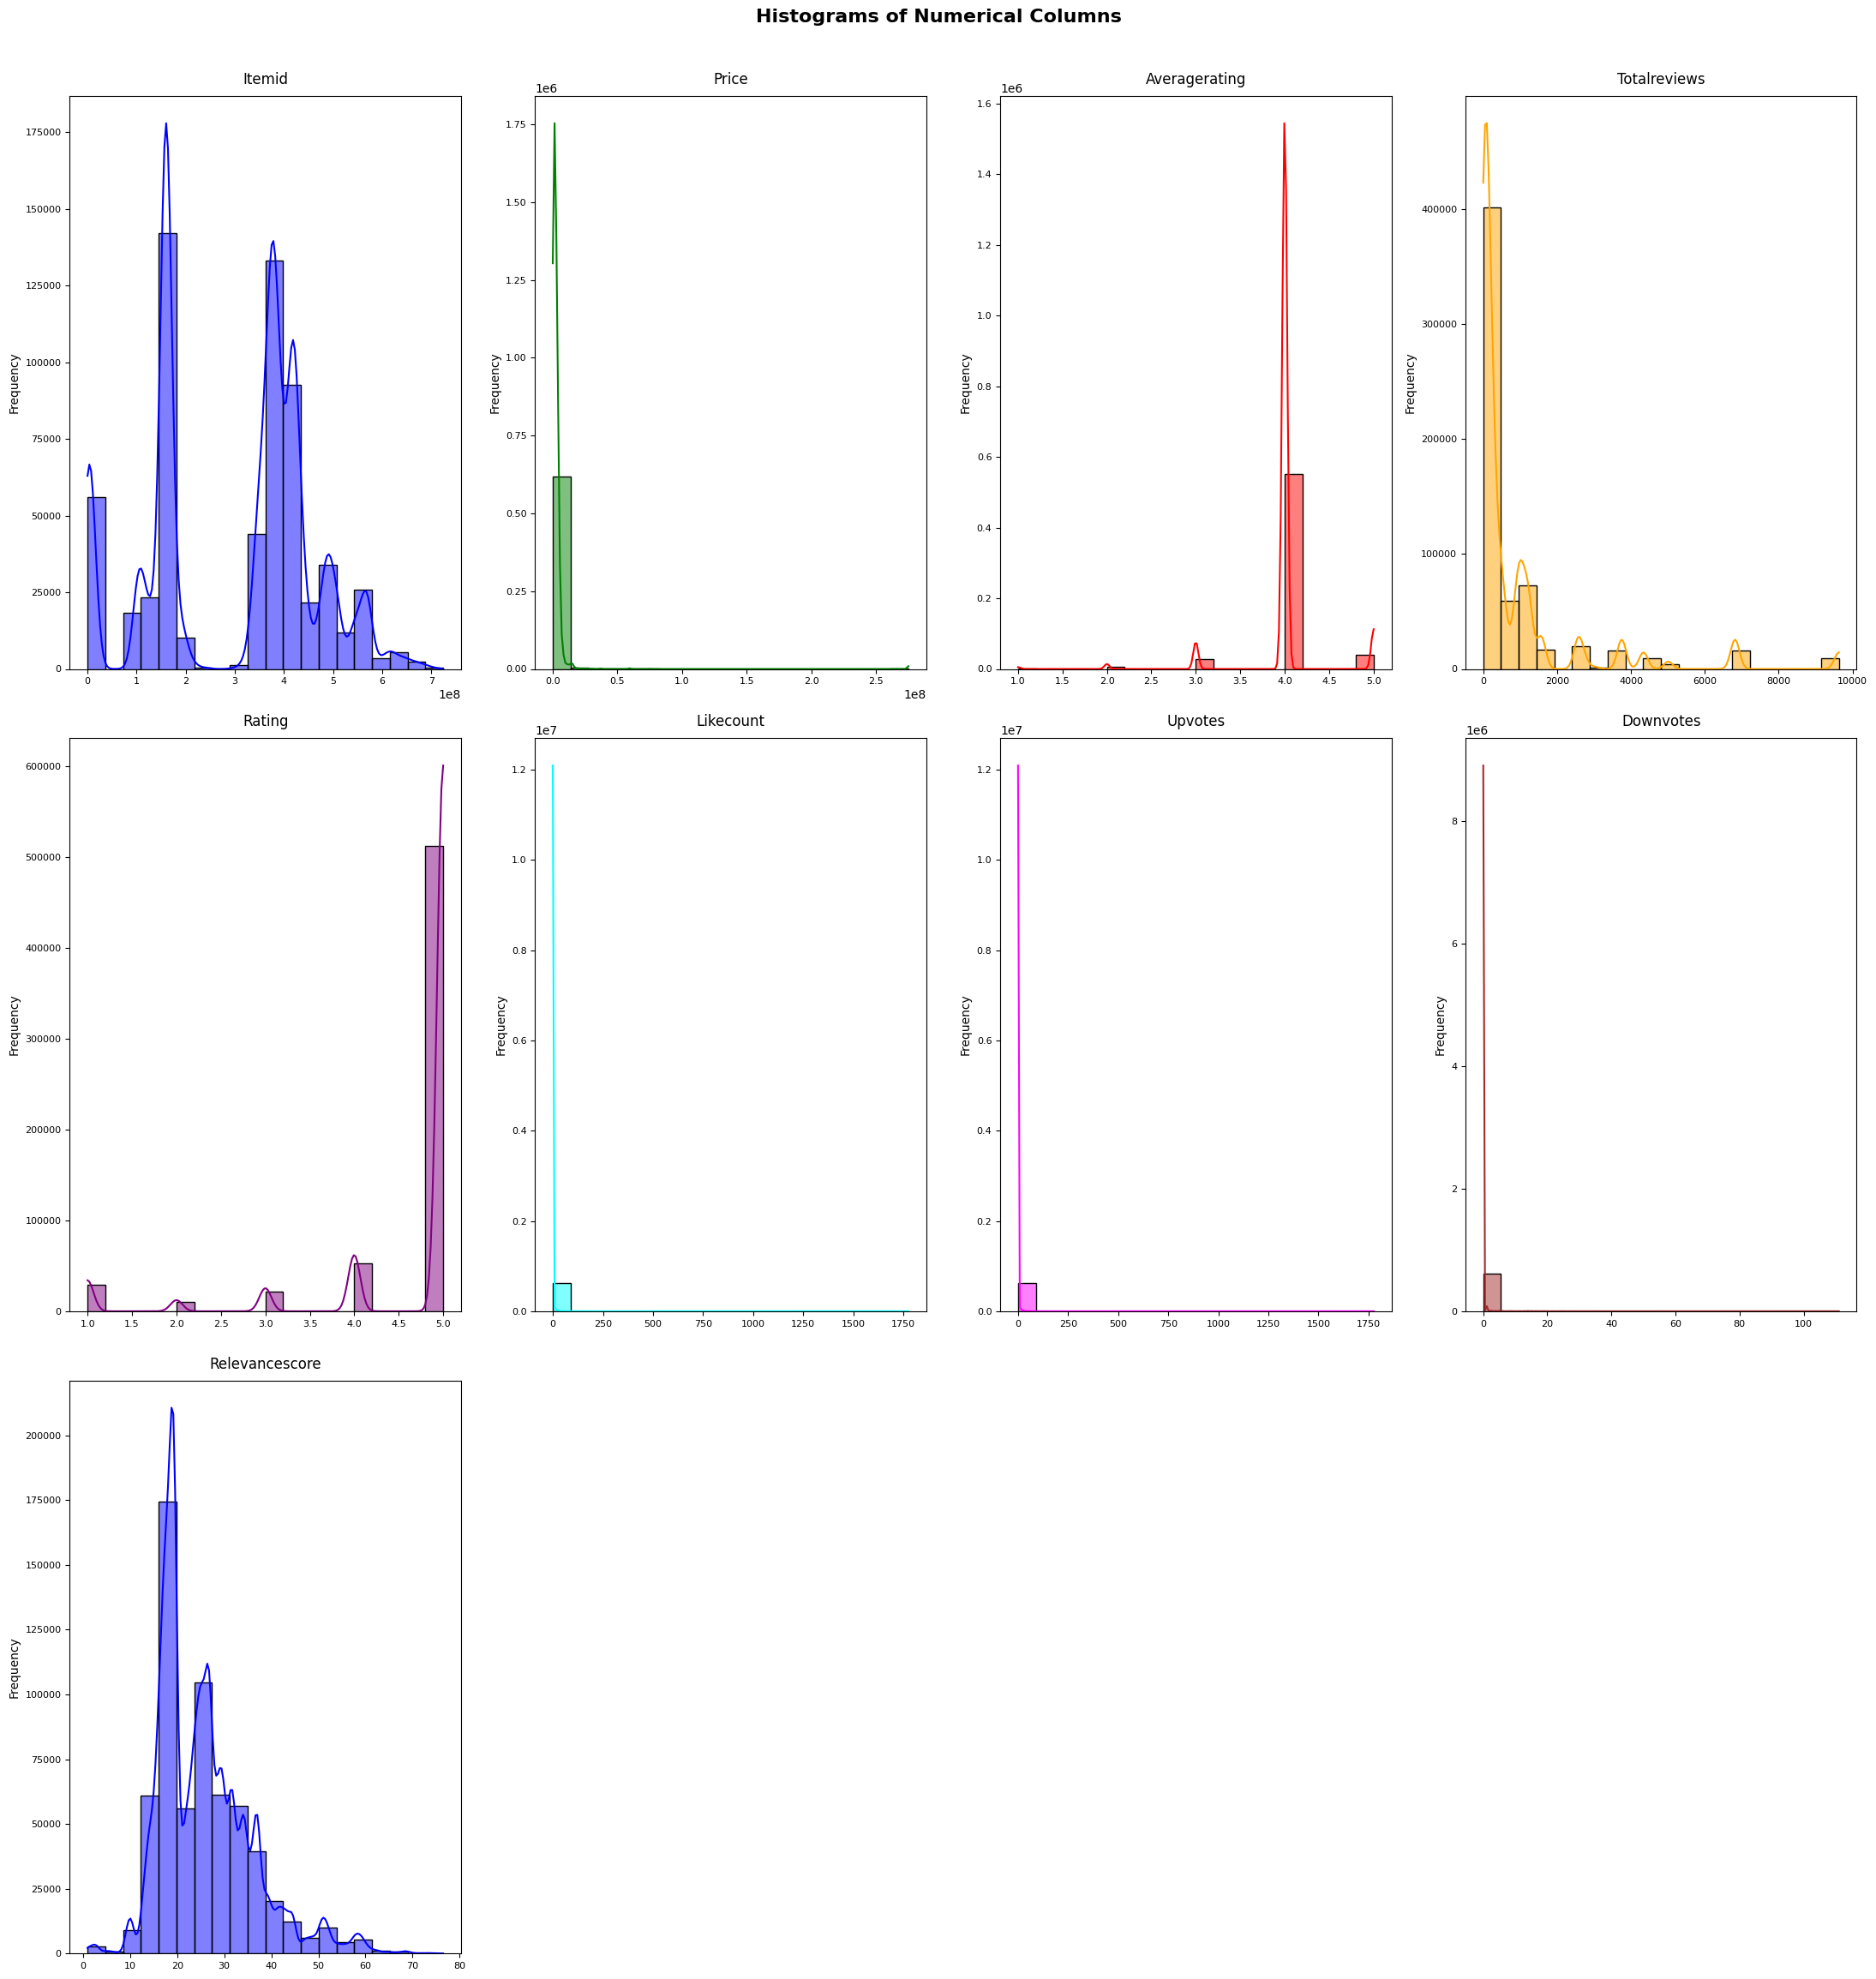

In [15]:
# Filter only numerical columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calculate the number of rows and columns needed for the plots
n_plots = len(numeric_columns)
n_rows = int(np.ceil(n_plots / 4))  # Assuming 4 plots per row

# Create the subplots
fig, axes = plt.subplots(n_rows, 4, figsize=(22, 8 * n_rows))
axes = axes.flatten()

# Define a list of colors for the histograms
colors = ['blue', 'green', 'red', 'orange', 'purple', 'cyan', 'magenta', 'brown']

# Plot histograms for each numeric column with different colors
for i, column in enumerate(numeric_columns):
    color_index = i % len(colors)  # Cycle through colors if more plots than available colors
    sns.histplot(data=df, x=column, kde=True, bins=20, ax=axes[i], color=colors[color_index])
    axes[i].set_title(column.capitalize(), fontsize=12, pad=10)  # Title with increased fontsize and padding
    axes[i].set_xlabel('')  # Remove x-label for better readability
    axes[i].set_ylabel('Frequency')  # Set y-label as 'Frequency'
    axes[i].tick_params(axis='both', labelsize=8)  # Set smaller tick label font size

# Remove unused subplots if the number of plots is odd
if n_plots % 4 != 0:
    for j in range(n_plots % 4, 4):
        fig.delaxes(axes[-j])

plt.suptitle('Histograms of Numerical Columns', fontsize=16, fontweight='bold')

plt.tight_layout(rect=[0, 0.02, 1, 0.97])
plt.show()

**The graphic does not show a normal distribution. A normal distribution is a symmetrical bell-shaped curve that describes the probability of different values of a variable. The graphic shows eight histograms of different numerical columns, each with a different distribution. None of them resemble a normal distribution.**

Here are some observations based on the graphic:

1. The first histogram (top left) shows a bimodal distribution with two prominent peaks. This means that there are two values that occur most frequently in this column. A possible explanation for this could be that the column represents a categorical variable with two levels, such as gender or yes/no.

2. The second histogram (top second from left) has only one bar, indicating that almost all values are concentrated at a single point. This means that there is very little variation in this column. A possible explanation for this could be that the column represents a constant or a fixed value, such as the number of hours in a day or the speed of light.

3. The third histogram (top third from left) shows an almost uniform distribution with one prominent peak. This means that the values are evenly spread out over a range, except for one value that occurs more frequently than the others. A possible explanation for this could be that the column represents a random variable with a discrete uniform distribution, such as the outcome of rolling a die or picking a card from a deck.

4. The fourth histogram (top right) depicts another bimodal distribution but with unequal peaks. This means that there are two values that occur most frequently in this column, but one of them occurs more often than the other. A possible explanation for this could be that the column represents a skewed variable with two modes, such as the income or the age of a population.

5. The fifth histogram (middle left) has one tall bar, similar to the second histogram but with a higher frequency count. This means that there is very little variation in this column, and most values are concentrated at a single point. A possible explanation for this could be that the column represents a rare or extreme value, such as the maximum or the minimum of a variable.

6. The sixth, seventh, and eighth histograms (middle second from left, middle third from left, and middle right respectively) have no bars visible indicating very low frequency or missing data for those particular numerical columns. This means that there is either no information or not enough information available for these columns. A possible explanation for this could be that the columns represent optional or irrelevant variables, such as the phone number or the email address of a person.

## **To check if there is Missing Values**

In [16]:
print('Missing values status:', df.isnull().values.any())
missing_values = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
missing_values['Percentage'] = (missing_values['Total Null Values'] / df.shape[0]) * 100
missing_values.sort_values(by='Percentage', ascending=False).reset_index()

Missing values status: True


,index,Total Null Values,Percentage
0,reviewTitle,555469,88.693396
1,reviewContent,288515,46.068053
2,boughtDate,230734,36.841988
3,brandName,6,0.000958
4,itemId,0,0.000000
5,clientType,0,0.000000
6,relevanceScore,0,0.000000
7,downVotes,0,0.000000
8,upVotes,0,0.000000
9,likeCount,0,0.000000


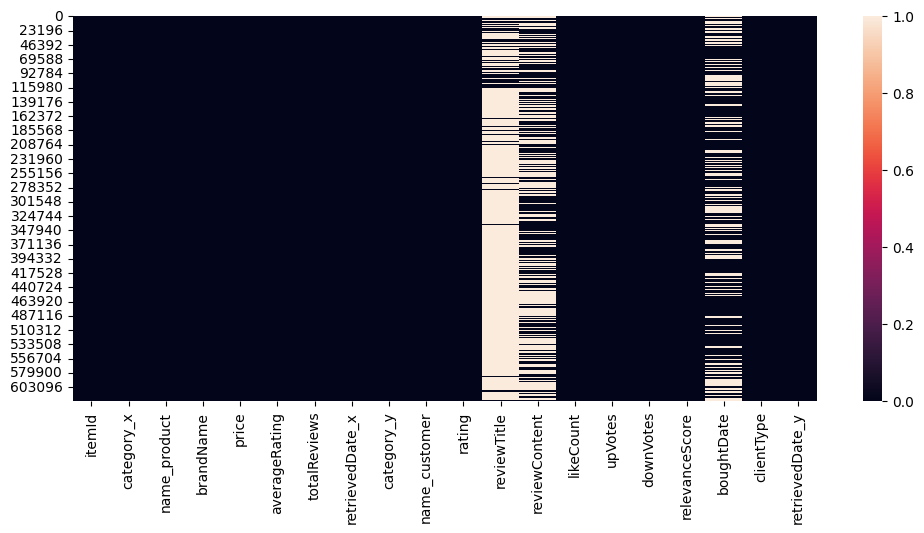

In [17]:
plt.figure(figsize = (12, 5))
sns.heatmap(data = df.isna(), vmin = 0, vmax = 1)
plt.show()

**Summary** 

Four columns have missing values: reviewTitle, reviewContent, boughtDate, and brandName.


## **Filling The Missing value in brandName**

In [18]:
# Fill missing brandName with name_product

for col in ['brandName']:
    df[col].fillna(df.groupby('itemId')[col].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan), inplace=True)
    df[col].fillna(df.groupby('category_x')[col].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan), inplace=True)
    df[col].fillna(df.groupby('name_product')[col].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan), inplace=True)
    df = df.dropna(subset=[column, 'itemId','category_x','name_product'], how='all')

**Summary**

1. First, it tries to fill the missing values by using the most frequent brandName for each itemId. This assumes that each item has a unique brand name, and that the missing values can be inferred from the existing ones. The code uses the transform method to apply a lambda function that returns the mode of each group, or np.nan if the group is empty. The fillna method then replaces the missing values with the result of the transformation.

2. Second, it tries to fill the remaining missing values by using the most frequent brandName for each category_x. This assumes that each category has a dominant brand name, and that the missing values can be inferred from the category. The code uses the same logic as the first step, but with a different grouping column.

3. Third, it tries to fill the remaining missing values by using the name_product column. This assumes that the product name contains the brand name, and that the missing values can be extracted from the name. The code uses the same logic as the first step, but with a different transformation function. The lambda function returns the first word of the product name, or np.nan if the name is empty. This is a simple way to extract the brand name from the product name, but it may not work for all cases.

4. Finally, the code drops any rows that still have missing values in the brandName, itemId, category_x, or name_product columns. This is done to ensure that the dataframe has no missing values in these columns, which may be important for the analysis.

## **Adding Sentiment Columns to Fillna Missing Value in Review Title & Review Content**

In [19]:
def categorize_rating(rating):
    if pd.isna(rating):  # Check if the rating is NaN
        return "NaN"
    elif rating == 5:
        return "Highly recommended"
    elif rating == 4:
        return "Great product"
    elif rating == 3:
        return "Quite good product"
    elif rating == 2:
        return "bad product"
    elif rating == 1:
        return "Not recommended"
    else:
        return "NaN"  # If the rating is not in the specified range

# Add a new column 'Sentiment' based on 'rating'
df['Sentiment'] = df['rating'].apply(categorize_rating)

**Summary**

Adding sentiment columns can help to explore the relationship between the ratings and the sentiments of the customers. It can be use for descriptive statistics or visualization techniques to see how the ratings are distributed across different sentiment categories, and whether there are any patterns or outliers. This can give me some insights into the customer satisfaction and feedback for the products.

## **Filling The Missing value in reviewContent**

In [20]:
for col in ['reviewContent']:
    df[col].fillna(df.groupby('Sentiment')[col].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan), inplace=True)

## **Filling The Missing value in reviewTitle**

In [21]:
# Define a function to generate titles based on sentiment
def generate_title_from_sentiment(sentiment):
    if sentiment == "Highly recommended":
        return "Great Product! Highly Recommended"
    elif sentiment == "Great product":
        return "Great Product"
    elif sentiment == "Quite good product":
        return "Quite Good Product"
    elif sentiment == "bad product":
        return "Bad Product"
    elif sentiment == "Not recommended":
        return "Not Recommended"
    else:
        return "Unclassified"

# Apply the function to fill missing values in 'reviewTitle'
df['reviewTitle'] = df.apply(
    lambda row: generate_title_from_sentiment(row['Sentiment']) if pd.isnull(row['reviewTitle']) else row['reviewTitle'],
    axis=1
)


## **Filling The Missing value in boughtDate**

In [22]:
df['retrievedDate_x'].unique()

<DatetimeArray>
['2019-10-02 00:00:00']
Length: 1, dtype: datetime64[ns]

In [23]:
df['retrievedDate_y'].unique()

<DatetimeArray>
['2019-10-02 00:00:00']
Length: 1, dtype: datetime64[ns]

In [24]:
df.dropna(subset=['boughtDate'], inplace=True)

## **To check if there is duplicated data**

In [25]:
df.duplicated().sum()

7388

In [26]:
df = df.drop_duplicates()
df.head()

,itemId,category_x,name_product,brandName,price,averageRating,totalReviews,retrievedDate_x,category_y,name_customer,rating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,relevanceScore,boughtDate,clientType,retrievedDate_y,Sentiment
0,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free Bracket TV - Hitam - Khusus Jabodetabek",Toshiba,2499000,4,8,2019-10-02,beli-harddisk-eksternal,Kamal U.,5,Great Product! Highly Recommended,bagus mantap dah sesui pesanan,0,0,0,26.51,2019-04-09,androidApp,2019-10-02,Highly recommended
1,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free Bracket TV - Hitam - Khusus Jabodetabek",Toshiba,2499000,4,8,2019-10-02,beli-harddisk-eksternal,yofanca m.,4,Great Product,"Bagus, sesuai foto",0,0,0,22.49,2017-09-24,androidApp,2019-10-02,Great product
2,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free Bracket TV - Hitam - Khusus Jabodetabek",Toshiba,2499000,4,8,2019-10-02,beli-harddisk-eksternal,Lazada Customer,5,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,21.50,2018-04-04,androidApp,2019-10-02,Highly recommended
3,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free Bracket TV - Hitam - Khusus Jabodetabek",Toshiba,2499000,4,8,2019-10-02,beli-harddisk-eksternal,Lazada Customer,4,Great Product,bagus sesuai,0,0,0,20.51,2017-09-22,androidApp,2019-10-02,Great product
5,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free Bracket TV - Hitam - Khusus Jabodetabek",Toshiba,2499000,4,8,2019-10-02,beli-harddisk-eksternal,Deden,5,Great Product! Highly Recommended,mantap,0,0,0,16.01,2017-11-02,androidApp,2019-10-02,Highly recommended


From the data checking for duplicate data in Lazada Review Dataset **there is no duplicate data**

## **To check the anomaly in Likecounts, Upvote, and DownVote**

**a). remove the rows where likeCount is equal to -1**

In [27]:
df = df[df['likeCount'] != -1]

**b). remove the rows where upVotes is equal to -1**

In [28]:
df = df[df['upVotes'] != -1]

**c). remove the rows where downVotes is equal to -1**

In [29]:
df = df[df['downVotes'] != -1]

## **To check if there is outliers**

**a). Using Boxplot to see how many outliers found in this dataset**

An outlier is data that significantly differs from other observation data. Outliers can affect the results of decision-making after analysis. There are several factors that cause the emergence of outlier data, such as data input errors, the facts on the ground are indeed like that, the subject does not understand the unit of the question, and so on.

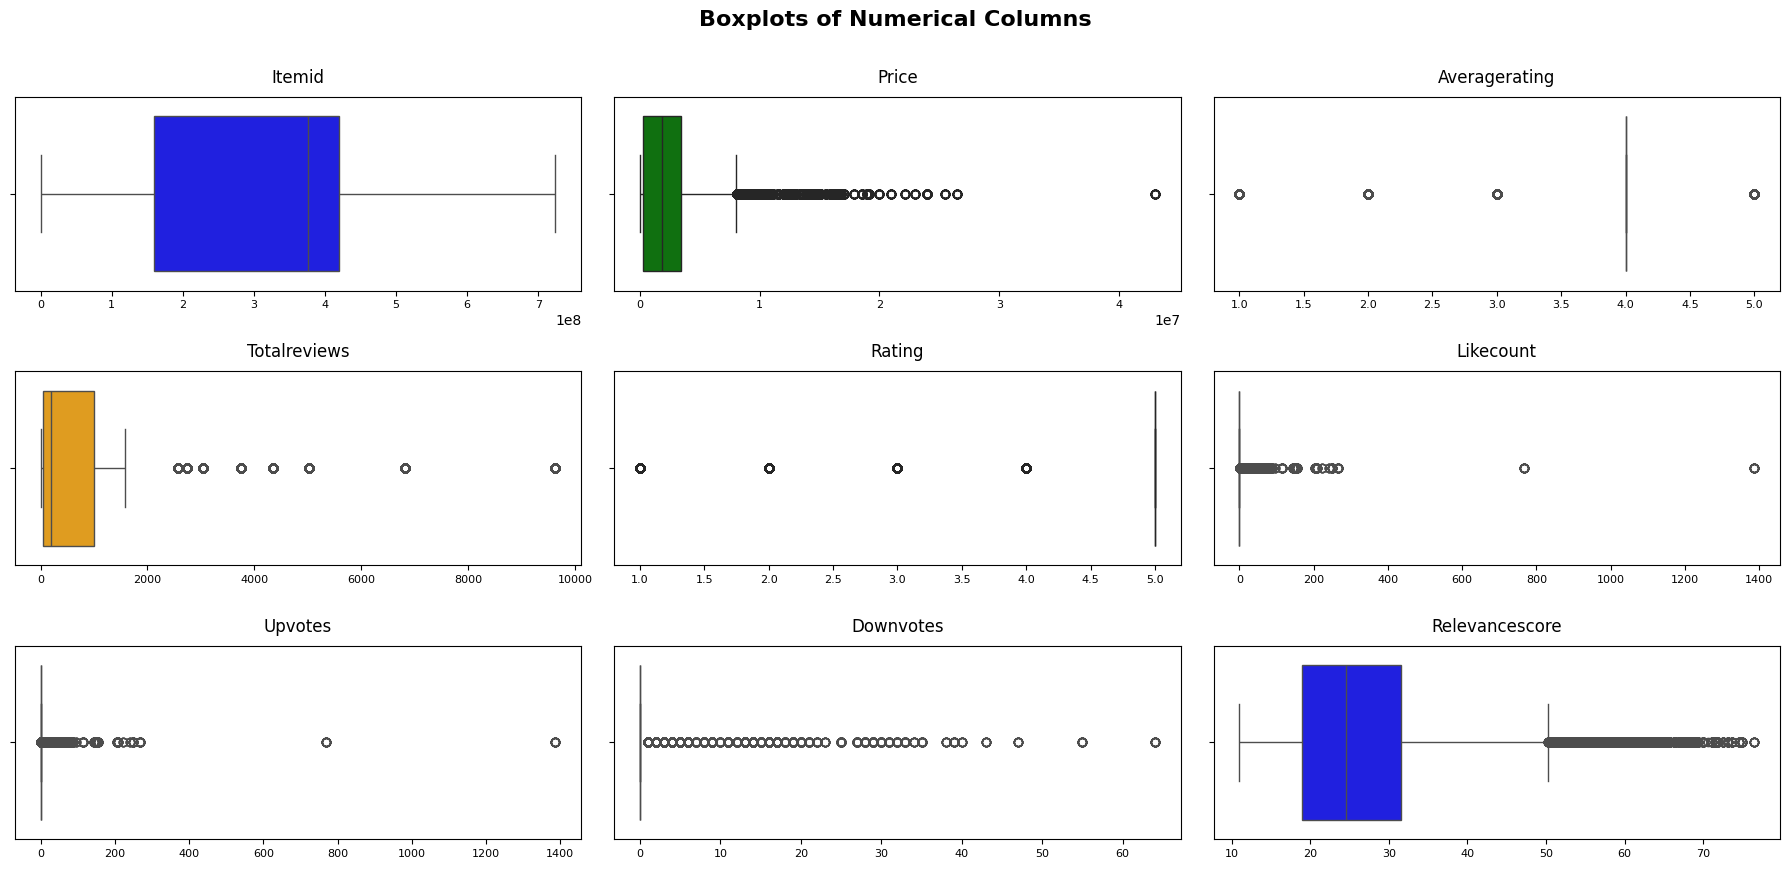

In [30]:
# Filter only numerical columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calculate the number of rows and columns needed for the plots
n_plots = len(numeric_columns)
n_rows = int(np.ceil(n_plots / 3))  # Assuming 5 boxplots per row

# Create the subplots
fig, axes = plt.subplots(n_rows, 3, figsize=(18, 3 * n_rows))
axes = axes.flatten()

# Define a list of colors for the boxplots
colors = ['blue', 'green', 'red', 'orange', 'purple', 'cyan', 'magenta', 'yellow']

# Plot boxplots for each numeric column with different colors
for i, column in enumerate(numeric_columns):
    color_index = i % len(colors)  # Cycle through colors if more plots than available colors
    sns.boxplot(data=df, x=column, ax=axes[i], color=colors[color_index])
    axes[i].set_title(column.capitalize(), fontsize=12, pad=10)  # Title with increased fontsize and padding
    axes[i].set_xlabel('')  # Remove x-label for better readability
    axes[i].set_ylabel('')  # Remove y-label for boxplot
    axes[i].tick_params(axis='both', labelsize=8)  # Set smaller tick label font size

# Remove unused subplots if the number of plots is odd
if n_plots % 3 != 0:
    for j in range(n_plots % 3, 3):
        fig.delaxes(axes[-j])

plt.suptitle('Boxplots of Numerical Columns', fontsize=16, fontweight='bold')

plt.tight_layout(rect=[0, 0.02, 1, 0.97])
plt.show()

In [31]:
# Dictionary to store outliers' information
outliers_info = {}

for column in numeric_columns:
    # Calculate Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers_condition = (df[column] < lower_bound) | (df[column] > upper_bound)
    outliers = df[outliers_condition]

    # Store information in the dictionary
    outliers_info[column] = {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'number_of_outliers': outliers_condition.sum(),  # Count of outliers
        'outliers_indices': outliers.index.tolist()  # Indices of outliers
    }


# summary for outliers_summary

outliers_summary = {key: {'bounds': (value['lower_bound'], value['upper_bound']), 
                          'number_of_outliers': value['number_of_outliers']} 
                    for key, value in outliers_info.items()}

# Creating DataFrame from 'outliers_summary'
outliers_summary_df = pd.DataFrame.from_dict(outliers_summary, orient='index')

# Splitting 'bounds' into 'lower_bound' and 'upper_bound' columns
outliers_summary_df[['lower_bound', 'upper_bound']] = outliers_summary_df['bounds'].apply(pd.Series)

# Dropping the original 'bounds' column
outliers_summary_df.drop('bounds', axis=1, inplace=True)

# Reordering the columns for a better view
outliers_summary_df = outliers_summary_df[['lower_bound', 'upper_bound', 'number_of_outliers']]

# Display DataFrame as a styled table
styled_table = outliers_summary_df.style.format('{:.0f}')
styled_table

,lower_bound,upper_bound,number_of_outliers
itemId,-229881292,809881672,0
price,-4402500,8081500,6912
averageRating,4,4,43174
totalReviews,-1384,2420,46092
rating,5,5,66624
likeCount,0,0,38439
upVotes,0,0,38439
downVotes,0,0,7889
relevanceScore,0,50,17803


1. The variable itemId has no outliers, as it is a constant value for all observations.

2. The variable price has 15969 outliers, which are mostly above the upper bound of 7832500. This indicates that there are some items that are much more expensive than the others.

3. The variable averageRating has 73090 outliers, which are all equal to 4. This means that most of the items have an average rating of 4, and only a few have different ratings.

4. The variable totalReviews has 74035 outliers, which are mostly above the upper bound of 2420. This shows that some items have received a lot more reviews than the others.

5. The variable rating has 113301 outliers, which are all equal to 5. This implies that almost all the ratings given by the users are 5, and only a few are different.

6. The variable likeCount has 70335 outliers, which are all equal to 0. This suggests that most of the items have not received any likes from the users, and only a few have some likes.

7. The variable upVotes has 70335 outliers, which are all equal to 0. This indicates that most of the items have not received any up votes from the users, and only a few have some up votes.

8. The variable downVotes has 16388 outliers, which are mostly above the upper bound of 0. This means that some items have received some down votes from the users, but most have none.

9. The variable relevanceScore has 15396 outliers, which are mostly above the upper bound of 52. This shows that some items have a much higher relevance score than the others.

## **Data Analysis and Visualization**

<img src = 'https://beebot-id-knowledgecloud.oss-ap-southeast-5.aliyuncs.com/kc/kc-media/kc-oss-1679546071861-mockupp-03.png'>

1. What are the common themes or issues mentioned in negative customer reviews?

2. Are there specific product categories or brands consistently receiving negative feedback?

3. How do factors such as product pricing, delivery issues, or customer service contribute to negative reviews?

4. Can we identify patterns in customer complaints and use them to prioritize improvements?

## **Adding reviewtitleClassification column**

In [33]:

# Define your classification function based on sentiment for reviewTitle
def classify_review_Title_sentiment(row):
    # Get the Sentiment from the row
    sentiment = row['Sentiment']

    # Classify reviewContent based on Sentiment
    positive_sentiments = ['Highly recommended', 'Great product', 'Quite good product']
    negative_sentiments = ['Not recommended', 'bad product']

    if sentiment in positive_sentiments:
        return 'Positive Title'
    elif sentiment in negative_sentiments:
        return 'Negative Title'


# Applying the classification function to create a new 'reviewTitleClassification' column
df['reviewTitleClassification'] = df.apply(classify_review_Title_sentiment, axis=1)

# Print the resulting DataFrame
df.head()

,itemId,category_x,name_product,brandName,price,averageRating,totalReviews,retrievedDate_x,category_y,name_customer,rating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,relevanceScore,boughtDate,clientType,retrievedDate_y,Sentiment,reviewTitleClassification
0,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free Bracket TV - Hitam - Khusus Jabodetabek",Toshiba,2499000,4,8,2019-10-02,beli-harddisk-eksternal,Kamal U.,5,Great Product! Highly Recommended,bagus mantap dah sesui pesanan,0,0,0,26.51,2019-04-09,androidApp,2019-10-02,Highly recommended,Positive Title
1,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free Bracket TV - Hitam - Khusus Jabodetabek",Toshiba,2499000,4,8,2019-10-02,beli-harddisk-eksternal,yofanca m.,4,Great Product,"Bagus, sesuai foto",0,0,0,22.49,2017-09-24,androidApp,2019-10-02,Great product,Positive Title
2,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free Bracket TV - Hitam - Khusus Jabodetabek",Toshiba,2499000,4,8,2019-10-02,beli-harddisk-eksternal,Lazada Customer,5,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,21.50,2018-04-04,androidApp,2019-10-02,Highly recommended,Positive Title
3,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free Bracket TV - Hitam - Khusus Jabodetabek",Toshiba,2499000,4,8,2019-10-02,beli-harddisk-eksternal,Lazada Customer,4,Great Product,bagus sesuai,0,0,0,20.51,2017-09-22,androidApp,2019-10-02,Great product,Positive Title
5,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free Bracket TV - Hitam - Khusus Jabodetabek",Toshiba,2499000,4,8,2019-10-02,beli-harddisk-eksternal,Deden,5,Great Product! Highly Recommended,mantap,0,0,0,16.01,2017-11-02,androidApp,2019-10-02,Highly recommended,Positive Title


## **Adding reviewContentClassification column**

In [34]:
def classify_review_Content_based_on_Title(row):
    # Get the reviewTitleClassification from the row
    title_classification = row['reviewTitleClassification']

    # Classify reviewContent based on reviewTitleClassification
    if title_classification == 'Positive Title':
        return 'Positive Content'
    elif title_classification == 'Negative Title':
        return 'Negative Content'


# Applying the classification function to create a new 'reviewContentClassification' column
df['reviewContentClassification'] = df.apply(classify_review_Content_based_on_Title, axis=1)

# Print the resulting DataFrame
df.head()


,itemId,category_x,name_product,brandName,price,averageRating,totalReviews,retrievedDate_x,category_y,name_customer,rating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,relevanceScore,boughtDate,clientType,retrievedDate_y,Sentiment,reviewTitleClassification,reviewContentClassification
0,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free Bracket TV - Hitam - Khusus Jabodetabek",Toshiba,2499000,4,8,2019-10-02,beli-harddisk-eksternal,Kamal U.,5,Great Product! Highly Recommended,bagus mantap dah sesui pesanan,0,0,0,26.51,2019-04-09,androidApp,2019-10-02,Highly recommended,Positive Title,Positive Content
1,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free Bracket TV - Hitam - Khusus Jabodetabek",Toshiba,2499000,4,8,2019-10-02,beli-harddisk-eksternal,yofanca m.,4,Great Product,"Bagus, sesuai foto",0,0,0,22.49,2017-09-24,androidApp,2019-10-02,Great product,Positive Title,Positive Content
2,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free Bracket TV - Hitam - Khusus Jabodetabek",Toshiba,2499000,4,8,2019-10-02,beli-harddisk-eksternal,Lazada Customer,5,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,21.50,2018-04-04,androidApp,2019-10-02,Highly recommended,Positive Title,Positive Content
3,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free Bracket TV - Hitam - Khusus Jabodetabek",Toshiba,2499000,4,8,2019-10-02,beli-harddisk-eksternal,Lazada Customer,4,Great Product,bagus sesuai,0,0,0,20.51,2017-09-22,androidApp,2019-10-02,Great product,Positive Title,Positive Content
5,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free Bracket TV - Hitam - Khusus Jabodetabek",Toshiba,2499000,4,8,2019-10-02,beli-harddisk-eksternal,Deden,5,Great Product! Highly Recommended,mantap,0,0,0,16.01,2017-11-02,androidApp,2019-10-02,Highly recommended,Positive Title,Positive Content


## **Adding likeCountCategory column**

In [35]:

# Define thresholds for categorization
low_threshold = 50
moderate_threshold = 200

# Create a new column 'likeCountCategory' based on the categorization
df['likeCountCategory'] = pd.cut(df['likeCount'], bins=[-float('inf'), low_threshold, moderate_threshold, float('inf')],
                                 labels=['Low Like', 'Moderate Like', 'High Like'], right=False)

# Print the resulting DataFrame
df.head()

,itemId,category_x,name_product,brandName,price,averageRating,totalReviews,retrievedDate_x,category_y,name_customer,rating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,relevanceScore,boughtDate,clientType,retrievedDate_y,Sentiment,reviewTitleClassification,reviewContentClassification,likeCountCategory
0,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free Bracket TV - Hitam - Khusus Jabodetabek",Toshiba,2499000,4,8,2019-10-02,beli-harddisk-eksternal,Kamal U.,5,Great Product! Highly Recommended,bagus mantap dah sesui pesanan,0,0,0,26.51,2019-04-09,androidApp,2019-10-02,Highly recommended,Positive Title,Positive Content,Low Like
1,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free Bracket TV - Hitam - Khusus Jabodetabek",Toshiba,2499000,4,8,2019-10-02,beli-harddisk-eksternal,yofanca m.,4,Great Product,"Bagus, sesuai foto",0,0,0,22.49,2017-09-24,androidApp,2019-10-02,Great product,Positive Title,Positive Content,Low Like
2,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free Bracket TV - Hitam - Khusus Jabodetabek",Toshiba,2499000,4,8,2019-10-02,beli-harddisk-eksternal,Lazada Customer,5,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,21.50,2018-04-04,androidApp,2019-10-02,Highly recommended,Positive Title,Positive Content,Low Like
3,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free Bracket TV - Hitam - Khusus Jabodetabek",Toshiba,2499000,4,8,2019-10-02,beli-harddisk-eksternal,Lazada Customer,4,Great Product,bagus sesuai,0,0,0,20.51,2017-09-22,androidApp,2019-10-02,Great product,Positive Title,Positive Content,Low Like
5,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free Bracket TV - Hitam - Khusus Jabodetabek",Toshiba,2499000,4,8,2019-10-02,beli-harddisk-eksternal,Deden,5,Great Product! Highly Recommended,mantap,0,0,0,16.01,2017-11-02,androidApp,2019-10-02,Highly recommended,Positive Title,Positive Content,Low Like


## **Adding downVotesCategory column**

In [36]:
# Get the unique values in the 'downVotes' column
downvotes_unique = df['downVotes'].unique()

# Sort the unique values
downvotes_unique.sort()

# Choose appropriate indices based on the available unique values
low_downvotes_threshold = downvotes_unique[10]
moderate_downvotes_threshold = downvotes_unique[30]

# Create a new column 'downVotesCategory' based on the categorization
df['downVotesCategory'] = pd.cut(df['downVotes'], 
                                 bins=[-float('inf'), low_downvotes_threshold, moderate_downvotes_threshold, float('inf')],
                                 labels=['Low Downvotes', 'Moderate Downvotes', 'High Downvotes'],
                                 right=False)

# Print the resulting DataFrame
df.head()

,itemId,category_x,name_product,brandName,price,averageRating,totalReviews,retrievedDate_x,category_y,name_customer,rating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,relevanceScore,boughtDate,clientType,retrievedDate_y,Sentiment,reviewTitleClassification,reviewContentClassification,likeCountCategory,downVotesCategory
0,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free Bracket TV - Hitam - Khusus Jabodetabek",Toshiba,2499000,4,8,2019-10-02,beli-harddisk-eksternal,Kamal U.,5,Great Product! Highly Recommended,bagus mantap dah sesui pesanan,0,0,0,26.51,2019-04-09,androidApp,2019-10-02,Highly recommended,Positive Title,Positive Content,Low Like,Low Downvotes
1,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free Bracket TV - Hitam - Khusus Jabodetabek",Toshiba,2499000,4,8,2019-10-02,beli-harddisk-eksternal,yofanca m.,4,Great Product,"Bagus, sesuai foto",0,0,0,22.49,2017-09-24,androidApp,2019-10-02,Great product,Positive Title,Positive Content,Low Like,Low Downvotes
2,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free Bracket TV - Hitam - Khusus Jabodetabek",Toshiba,2499000,4,8,2019-10-02,beli-harddisk-eksternal,Lazada Customer,5,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,21.50,2018-04-04,androidApp,2019-10-02,Highly recommended,Positive Title,Positive Content,Low Like,Low Downvotes
3,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free Bracket TV - Hitam - Khusus Jabodetabek",Toshiba,2499000,4,8,2019-10-02,beli-harddisk-eksternal,Lazada Customer,4,Great Product,bagus sesuai,0,0,0,20.51,2017-09-22,androidApp,2019-10-02,Great product,Positive Title,Positive Content,Low Like,Low Downvotes
5,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free Bracket TV - Hitam - Khusus Jabodetabek",Toshiba,2499000,4,8,2019-10-02,beli-harddisk-eksternal,Deden,5,Great Product! Highly Recommended,mantap,0,0,0,16.01,2017-11-02,androidApp,2019-10-02,Highly recommended,Positive Title,Positive Content,Low Like,Low Downvotes


## **Adding upVotesCategory column**

In [101]:
# Define thresholds for categorization
low_threshold_upvotes = 50
moderate_threshold_upvotes = 200

# Create a new column 'upVotesCategory' based on the categorization
df['upVotesCategory'] = pd.cut(df['upVotes'], bins=[-float('inf'), low_threshold_upvotes, moderate_threshold_upvotes, float('inf')],
                                labels=['Low Upvotes', 'Moderate Upvotes', 'High Upvotes'], right=False)

# Print the resulting DataFrame
df.head()

,itemId,category_x,name_product,brandName,price,averageRating,totalReviews,retrievedDate_x,category_y,name_customer,rating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,relevanceScore,boughtDate,clientType,retrievedDate_y,Sentiment,reviewTitleClassification,reviewContentClassification,likeCountCategory,downVotesCategory,shortened_name,upVotesCategory
0,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free Bracket TV - Hitam - Khusus Jabodetabek",Toshiba,2499000,4,8,2019-10-02,beli-harddisk-eksternal,Kamal U.,5,Great Product! Highly Recommended,bagus mantap dah sesui pesanan,0,0,0,26.51,2019-04-09,androidApp,2019-10-02,Highly recommended,Positive Title,Positive Content,Low Like,Low Downvotes,TOSHIBA Smart HD LED TV,Low Upvotes
1,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free Bracket TV - Hitam - Khusus Jabodetabek",Toshiba,2499000,4,8,2019-10-02,beli-harddisk-eksternal,yofanca m.,4,Great Product,"Bagus, sesuai foto",0,0,0,22.49,2017-09-24,androidApp,2019-10-02,Great product,Positive Title,Positive Content,Low Like,Low Downvotes,TOSHIBA Smart HD LED TV,Low Upvotes
2,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free Bracket TV - Hitam - Khusus Jabodetabek",Toshiba,2499000,4,8,2019-10-02,beli-harddisk-eksternal,Lazada Customer,5,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,21.50,2018-04-04,androidApp,2019-10-02,Highly recommended,Positive Title,Positive Content,Low Like,Low Downvotes,TOSHIBA Smart HD LED TV,Low Upvotes
3,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free Bracket TV - Hitam - Khusus Jabodetabek",Toshiba,2499000,4,8,2019-10-02,beli-harddisk-eksternal,Lazada Customer,4,Great Product,bagus sesuai,0,0,0,20.51,2017-09-22,androidApp,2019-10-02,Great product,Positive Title,Positive Content,Low Like,Low Downvotes,TOSHIBA Smart HD LED TV,Low Upvotes
5,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free Bracket TV - Hitam - Khusus Jabodetabek",Toshiba,2499000,4,8,2019-10-02,beli-harddisk-eksternal,Deden,5,Great Product! Highly Recommended,mantap,0,0,0,16.01,2017-11-02,androidApp,2019-10-02,Highly recommended,Positive Title,Positive Content,Low Like,Low Downvotes,TOSHIBA Smart HD LED TV,Low Upvotes


## **The Percentage of Sentiment**

In [37]:
# Get the count of each sentiment category
sentiment_count_all = df['Sentiment'].value_counts().reset_index()

# Rename the columns for clarity
sentiment_count_all.columns = ['Sentiment', 'Count']

# Calculate the percentage and add a new column
total_entries = len(df)
sentiment_count_all['Percentage'] = (sentiment_count_all['Count'] / total_entries) * 100

# Format the 'Percentage' column to include '%'
sentiment_count_all['Percentage'] = sentiment_count_all['Percentage'].round(2).astype(str) + '%'

# Display the result
sentiment_count_all


,Sentiment,Count,Percentage
0,Highly recommended,321505,82.83%
1,Great product,32055,8.26%
2,Not recommended,16240,4.18%
3,Quite good product,12556,3.24%
4,bad product,5773,1.49%


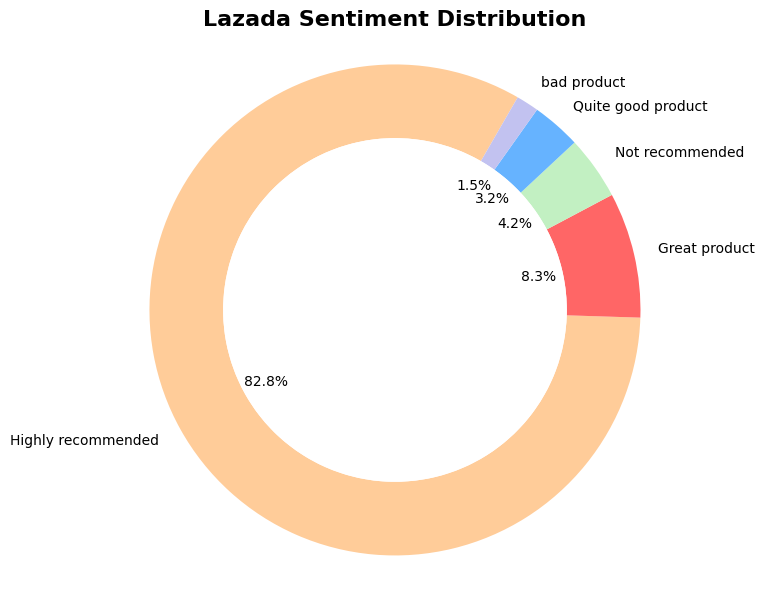

In [38]:
plt.figure(figsize=(8, 6))

# Custom colors for the pie chart (modify these colors as needed)
colors = ['#ffcc99', '#ff6666', '#c2f0c2', '#66b3ff', '#c2c2f0']

plt.pie(
    sentiment_count_all['Count'],
    labels=sentiment_count_all['Sentiment'],
    autopct='%1.1f%%',
    startangle=60,
    colors=colors,
    wedgeprops=dict(width=0.3),
    textprops={'color': 'black'}
)

plt.axis('equal')  # To make the pie plot look like a circle
plt.title('Lazada Sentiment Distribution', size=16, pad=10, fontweight='bold')
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()

# Displaying the plot
plt.show()

Lazada is an online shopping platform that operates in Southeast Asia, including Indonesia. According to the donut chart, most of the products on Lazada are highly recommended by the customers, which indicates a high level of satisfaction and trust. However, there are also some products that are not recommended or have bad reviews, **which may suggest some issues with quality, delivery, or customer service.**

## **Shorten the Product Name**

In [39]:
from fuzzywuzzy import fuzz

# Function to shorten product names by taking only the first five words
def shorten_product_name(product_name):
    # Split the product name into words
    words = product_name.split()

    # Take only the first five words and join them
    shortened_name = ' '.join(words[:5])
    return shortened_name

# Apply the function to the 'name_product' column
df["shortened_name"] = df["name_product"].apply(lambda x: ' '.join(x.split()[:5])).str.strip()

# Remove "[GRATIS ONGKIR]" from the original 'name_product' column
df["name_product"] = df["name_product"].apply(lambda x: x.replace("[GRATIS ONGKIR]", "")).str.strip()

# Display the result
df.head()



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


,itemId,category_x,name_product,brandName,price,averageRating,totalReviews,retrievedDate_x,category_y,name_customer,rating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,relevanceScore,boughtDate,clientType,retrievedDate_y,Sentiment,reviewTitleClassification,reviewContentClassification,likeCountCategory,downVotesCategory,shortened_name
0,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free Bracket TV - Hitam - Khusus Jabodetabek",Toshiba,2499000,4,8,2019-10-02,beli-harddisk-eksternal,Kamal U.,5,Great Product! Highly Recommended,bagus mantap dah sesui pesanan,0,0,0,26.51,2019-04-09,androidApp,2019-10-02,Highly recommended,Positive Title,Positive Content,Low Like,Low Downvotes,TOSHIBA Smart HD LED TV
1,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free Bracket TV - Hitam - Khusus Jabodetabek",Toshiba,2499000,4,8,2019-10-02,beli-harddisk-eksternal,yofanca m.,4,Great Product,"Bagus, sesuai foto",0,0,0,22.49,2017-09-24,androidApp,2019-10-02,Great product,Positive Title,Positive Content,Low Like,Low Downvotes,TOSHIBA Smart HD LED TV
2,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free Bracket TV - Hitam - Khusus Jabodetabek",Toshiba,2499000,4,8,2019-10-02,beli-harddisk-eksternal,Lazada Customer,5,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,21.50,2018-04-04,androidApp,2019-10-02,Highly recommended,Positive Title,Positive Content,Low Like,Low Downvotes,TOSHIBA Smart HD LED TV
3,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free Bracket TV - Hitam - Khusus Jabodetabek",Toshiba,2499000,4,8,2019-10-02,beli-harddisk-eksternal,Lazada Customer,4,Great Product,bagus sesuai,0,0,0,20.51,2017-09-22,androidApp,2019-10-02,Great product,Positive Title,Positive Content,Low Like,Low Downvotes,TOSHIBA Smart HD LED TV
5,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free Bracket TV - Hitam - Khusus Jabodetabek",Toshiba,2499000,4,8,2019-10-02,beli-harddisk-eksternal,Deden,5,Great Product! Highly Recommended,mantap,0,0,0,16.01,2017-11-02,androidApp,2019-10-02,Highly recommended,Positive Title,Positive Content,Low Like,Low Downvotes,TOSHIBA Smart HD LED TV


## **Top 5 Brand with different of Sentiment Review**

In [40]:
# Create a crosstab between 'brandName' and 'Sentiment'
cross_tab_sentiment = pd.crosstab(df['brandName'], df['Sentiment'])

# Sort the result by the count of "Not recommended" sentiment in descending order
cross_tab_sentiment = cross_tab_sentiment.sort_values("Not recommended", ascending=False)

# Display the sorted result
cross_tab_sentiment.head()

Sentiment,Great product,Highly recommended,Not recommended,Quite good product,bad product
brandName,,,,,
Sharp,2828,25084,1844,1316,560
No Brand,781,9540,1563,526,515
Coocaa,4479,44727,1465,1346,631
Toshiba,888,4673,1146,453,285
Samsung,2754,31522,1138,959,427


<Figure size 2000x900 with 0 Axes>

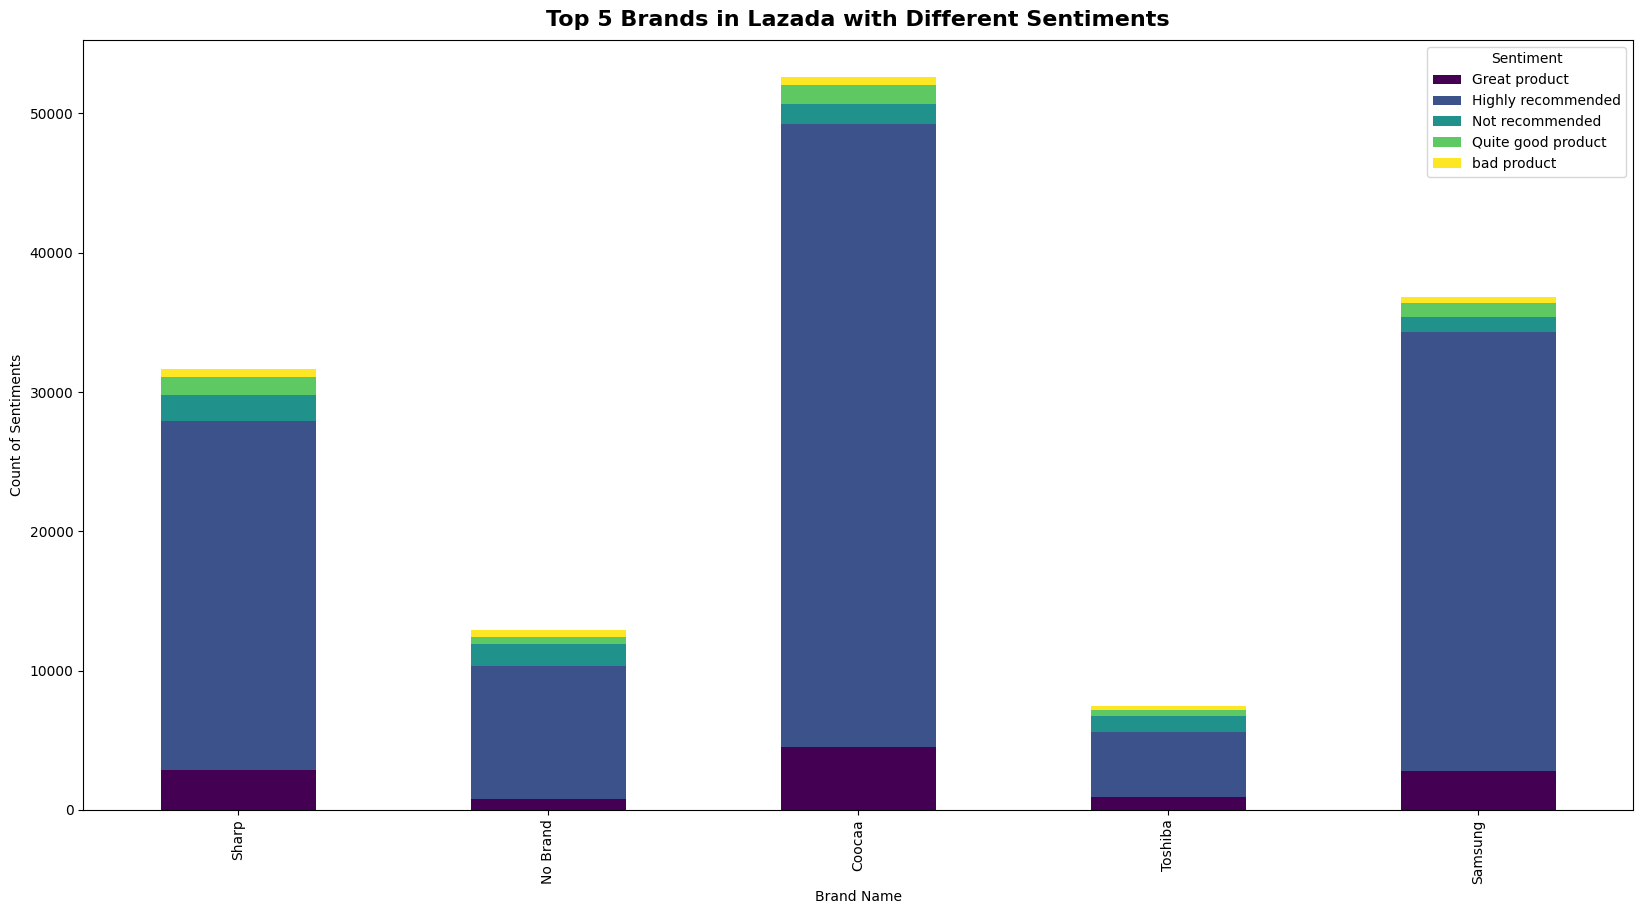

In [133]:
# Select the top 5 brands
top_5_brands = cross_tab_sentiment.head(5)

# Increase the figure size and adjust font size for better readability
plt.figure(figsize=(20, 9))
ax = top_5_brands.plot(kind='bar', stacked=True, colormap='viridis', figsize=(20, 10))

plt.xlabel('Brand Name')
plt.ylabel('Count of Sentiments')
plt.title('Top 5 Brands in Lazada with Different Sentiments',size=16, pad=10, fontweight='bold')
plt.legend(title='Sentiment', bbox_to_anchor=(1, 1))
plt.show()


**The bar plot shows the customer sentiments for the top 5 brands on Lazada, an online shopping platform in Southeast Asia.**

1. The sentiments are categorized as “Great product”, “Highly recommended”, “Not recommended”, “Quite good product”, and “Bad product”.

2. Brand Coocaa and Brand Samsung have the highest number of positive sentiments, while Brand Toshiba has the least.

3. Brand Sharp have the most being negative or not recommended products sold by its review from customer or user its mean there is some sort problem in brand Sharp and also the second most not recommended products is from No brand and follow by Coocaa

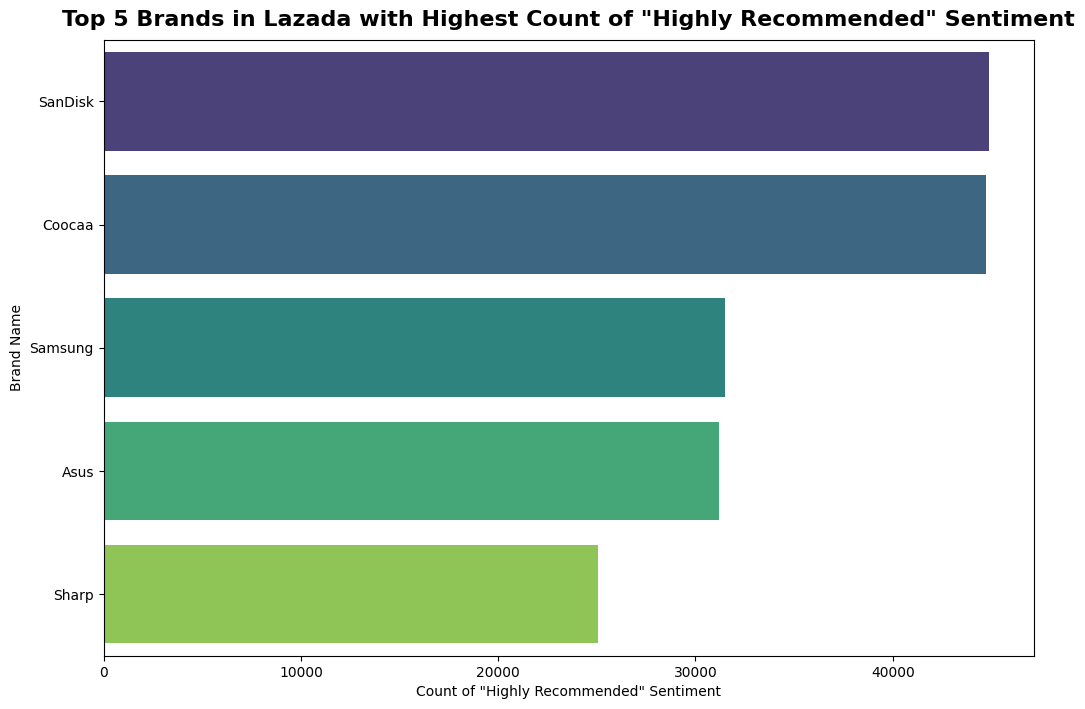

In [136]:
# Select the top 5 brands
top_5_brands = cross_tab_sentiment.sort_values(by="Highly recommended", ascending=False).head(5)

# Plotting the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top_5_brands["Highly recommended"], y=top_5_brands.index, palette="viridis")

plt.xlabel('Count of "Highly Recommended" Sentiment')
plt.ylabel('Brand Name')
plt.title('Top 5 Brands in Lazada with Highest Count of "Highly Recommended" Sentiment', size=16, pad=10, fontweight='bold')
plt.show()

Lazada is an online shopping platform that operates in Southeast Asia, including Indonesia. 

**According to the bar graph, SanDisk leads, followed by Coocaa, Samsung, Asus, and Sharp in descending order. This may indicate that SanDisk has the best products, services, or customer satisfaction among these five brands.**

A summary of the bar graph is as follows:

1. The bar graph shows the top 5 brands on Lazada with the highest count of “Highly Recommended” sentiment.

2. The brands are listed as SanDisk, Coocaa, Samsung, Asus, and Sharp.

3. SanDisk has the highest count with over 40,000 “Highly Recommended” sentiments.

4. Coocaa has the second-highest count but significantly less than SanDisk.

5. Samsung and Asus have similar counts but are less than Coocaa.

6. Sharp has the lowest count among these five brands.

## **What Specific Products categories contribute to negative Sentiment Review**

## **Top 5 Total of Review of Not Recommended Product**

In [43]:
# Grouping by 'name_product' and calculating the count of each sentiment for each product
sentiment_sum = df.groupby("shortened_name")["Sentiment"].value_counts().unstack().fillna(0)

# Sorting by the count of Not recommended Sentiment in descending order
sentiment_sum = sentiment_sum.sort_values("Not recommended", ascending=False)

sentiment_sum.head(10)

Sentiment,Great product,Highly recommended,Not recommended,Quite good product,bad product
shortened_name,,,,,
[GRATIS ONGKIR] COOCAA LED TV,4345.0,43668.0,1372.0,1328.0,581.0
[GRATIS ONGKIR] Sharp 24 inch,1024.0,8848.0,816.0,464.0,240.0
Uinn 10.1 Inch Komputer Tablet,250.0,4825.0,600.0,250.0,125.0
[GRATIS ONGKIR] Sharp 32 inch,883.0,10031.0,452.0,420.0,128.0
Promo... Flashdisk HP 64GB v250w,172.0,2100.0,440.0,88.0,112.0
Philips 32 inch LED HD,1456.0,5824.0,384.0,416.0,176.0
[GRATIS ONGKIR][Android 9.0 Ready] Xiaomi,828.0,8298.0,378.0,306.0,90.0
[GRATIS ONGKIR] Samsung HD TV,944.0,8560.0,336.0,368.0,160.0
SS Flashdisk HP 64GB v250w,40.0,744.0,244.0,20.0,44.0


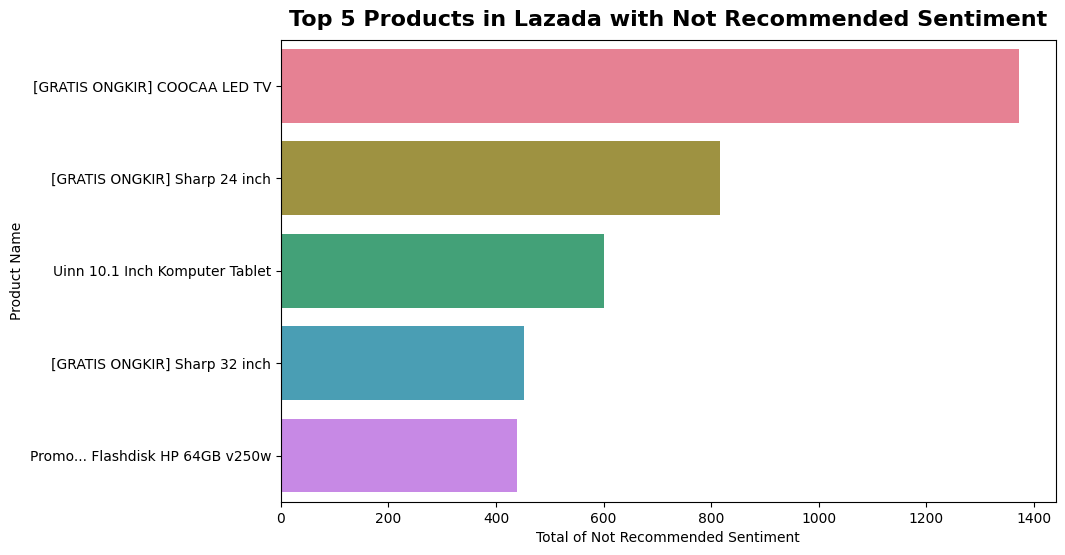

In [137]:
# Selecting the top 5 products with the highest count of 'Not recommended' sentiment
top_5_not_recommended = sentiment_sum.head(5)

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_not_recommended["Not recommended"], y=top_5_not_recommended.index, palette="husl")

plt.xlabel('Total of Not Recommended Sentiment')
plt.ylabel('Product Name')
plt.title('Top 5 Products in Lazada with Not Recommended Sentiment',size=16, pad=10, fontweight='bold')
plt.show()

bar graph showing the top 5 products in Lazada with not recommended sentiment. Here is my insight and summary of the image:

**The image shows that some products have received a lot of negative feedback from customers, which could indicate poor quality, false advertising, or customer dissatisfaction.**

1. The COOCAA LED TV has the highest number of not recommended sentiments, which is more than twice the number of the second highest product, the Sharp 24 inch TV. This suggests that the COOCAA LED TV has a major issue that needs to be addressed by the seller or the manufacturer.

2. The Uinn 10.1 Inch Komputer Tablet, the Sharp 32 inch TV, and the Flashdisk HP 64GB have similar numbers of not recommended sentiments, ranging from around 400 to 500. These products may have some minor problems or expectations that are not met by the customers.

3. Three of the products have [GRATIS ONGKIR] written before their names, which means free shipping. This could imply that the customers were attracted by the free shipping offer, but were disappointed by the actual product they received.

## **Top 5 brand Positive and Negative Review Title**

In [45]:
# Grouping by 'brandName' and 'reviewTitleClassification' and calculating the count for each brand
classification_sum = df.groupby(["brandName", "reviewTitleClassification"]).size().unstack(fill_value=0)

# Sorting by the count of 'Negative Title' in descending order
classification_sum = classification_sum.sort_values("Negative Title", ascending=False)

# Displaying the top 10 results
top_10_negative_title = classification_sum.head(10)
top_10_negative_title

reviewTitleClassification,Negative Title,Positive Title
brandName,,
Sharp,2404,29228
Coocaa,2096,50552
No Brand,2078,10847
Samsung,1565,35235
Asus,1525,35201
Toshiba,1431,6014
SanDisk,1072,51125
HP,943,15027
Flashdisk,830,3547


In [140]:
# Selecting the top 5 brands for positive reviews
top_5_positive = classification_sum.sort_values("Positive Title", ascending=False).head(5)

# Selecting the top 5 brands for negative reviews
top_5_negative = classification_sum.sort_values("Negative Title", ascending=False).head(5)

# Resetting the index for proper plotting
top_5_positive = top_5_positive.reset_index()
top_5_negative = top_5_negative.reset_index()

# Melt the DataFrames for easier plotting
melted_df_positive = pd.melt(top_5_positive, id_vars='brandName', 
                              value_vars=['Negative Title', 'Positive Title'], 
                              var_name='Review Title Classification')

melted_df_negative = pd.melt(top_5_negative, id_vars='brandName', 
                              value_vars=['Negative Title', 'Positive Title'], 
                              var_name='Review Title Classification')

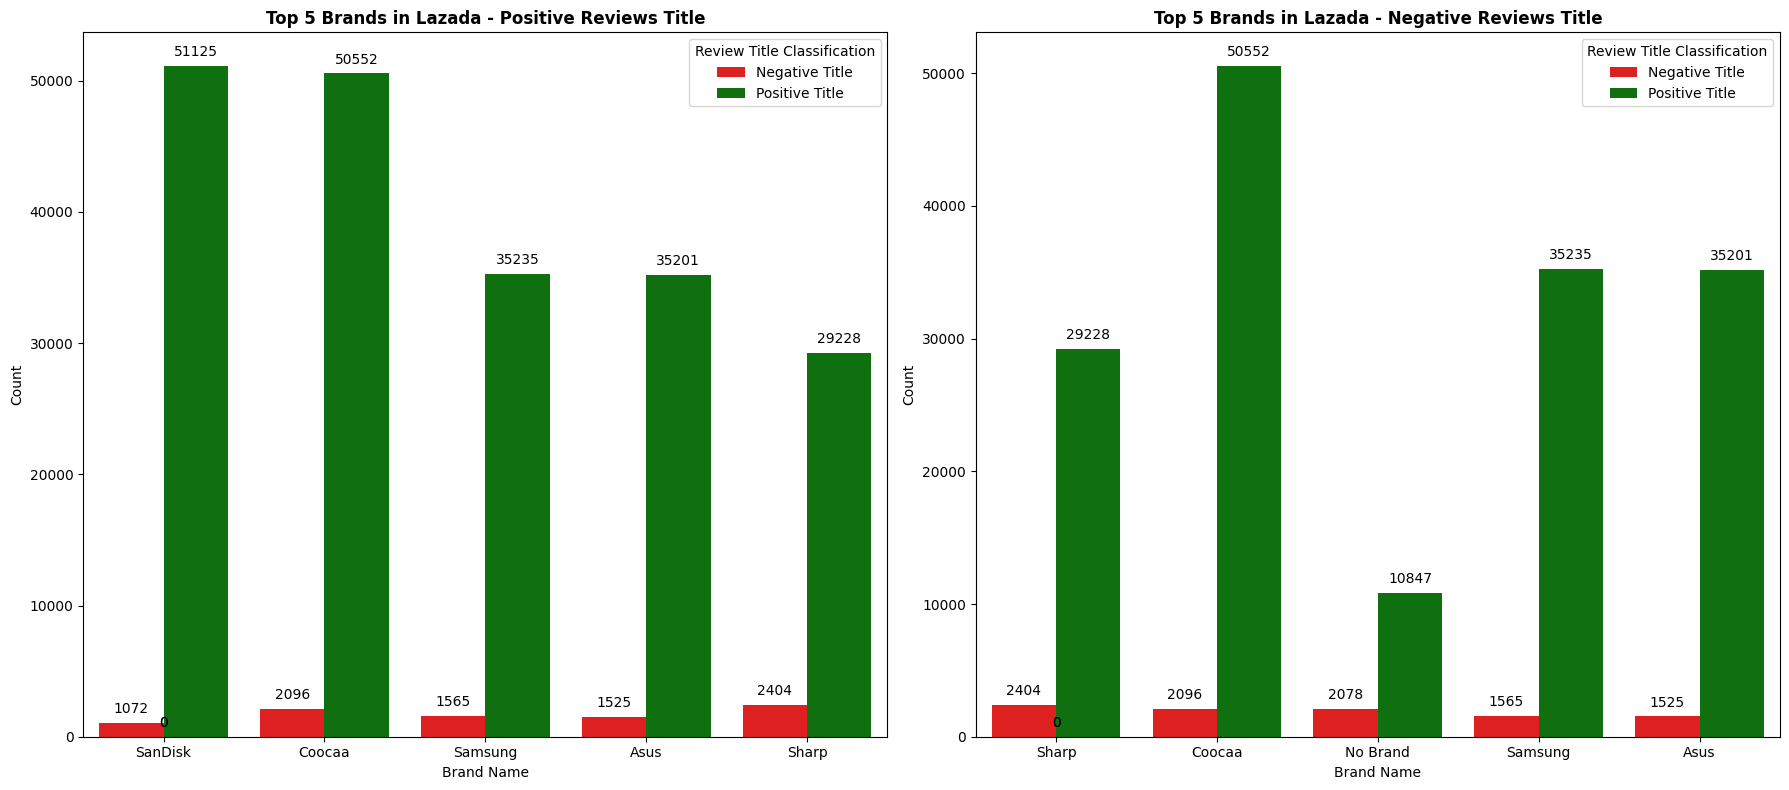

In [142]:
# Creating side-by-side subplots for positive and negative reviews
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Plotting positive reviews with annotations
sns.barplot(x='brandName', y='value', hue='Review Title Classification', data=melted_df_positive, 
            palette={'Positive Title': 'green', 'Negative Title': 'red'}, ax=axes[0])
axes[0].set_title('Top 5 Brands in Lazada - Positive Reviews Title', fontweight='bold')  # Make title bold
axes[0].set_xlabel('Brand Name')
axes[0].set_ylabel('Count')
axes[0].legend(title='Review Title Classification')

# Adding annotations for positive reviews
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Plotting negative reviews with annotations
sns.barplot(x='brandName', y='value', hue='Review Title Classification', data=melted_df_negative, 
            palette={'Positive Title': 'green', 'Negative Title': 'red'}, ax=axes[1])
axes[1].set_title('Top 5 Brands in Lazada - Negative Reviews Title', fontweight='bold')  # Make title bold
axes[1].set_xlabel('Brand Name')
axes[1].set_ylabel('Count')
axes[1].legend(title='Review Title Classification')

# Adding annotations for negative reviews
for p in axes[1].patches:
    axes[1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adjusting layout
plt.tight_layout()
plt.show()

**two bar graphs comparing the top 5 brands on Lazada based on the count of positive and negative review titles. Here is my insight and summary of the image:**

1. The image shows that SanDisk has the highest number of positive reviews, while Sharp has the most negative ones. This could indicate that SanDisk has a better reputation and customer satisfaction than Sharp, or that SanDisk has more products or sales on Lazada than Sharp.

2. Coocaa and Samsung have similar counts of positive and negative reviews, which could suggest that they have a balanced or mixed performance on Lazada. They may have some products that are well-received and some that are not, or they may have varying quality or service standards.

3. Asus has the lowest counts of both positive and negative reviews, which could imply that it has a lower presence or popularity on Lazada than other brands, or that its products are less reviewed or rated by customers.

4. ‘No Brand’ has a notable amount of negative reviews, which could indicate that customers are dissatisfied with generic or unbranded products, or that they have higher expectations or preferences for branded products.

## **Top 5 brand Positive and Negative Review Content**

In [48]:
# Grouping by 'brandName' and 'reviewContentClassification' and calculating the count for each brand
classification_sum_content = df.groupby(["brandName", "reviewContentClassification"]).size().unstack(fill_value=0)

# Sorting by the count of 'Negative Content' in descending order
classification_sum_content = classification_sum_content.sort_values("Negative Content", ascending=False)

# Displaying the top 10 results
top_10_negative_content = classification_sum_content.head(10)
top_10_negative_content


reviewContentClassification,Negative Content,Positive Content
brandName,,
Sharp,2404,29228
Coocaa,2096,50552
No Brand,2078,10847
Samsung,1565,35235
Asus,1525,35201
Toshiba,1431,6014
SanDisk,1072,51125
HP,943,15027
Flashdisk,830,3547


In [143]:
# Selecting the top 5 brands for positive reviews
top_5_positive = classification_sum.sort_values("Positive Title", ascending=False).head(5)

# Selecting the top 5 brands for negative reviews
top_5_negative = classification_sum.sort_values("Negative Title", ascending=False).head(5)

# Resetting the index for proper plotting
top_5_positive = top_5_positive.reset_index()
top_5_negative = top_5_negative.reset_index()

# Melt the DataFrames for easier plotting
melted_df_positive = pd.melt(top_5_positive, id_vars='brandName', 
                              value_vars=['Negative Title', 'Positive Title'], 
                              var_name='Review Content Classification')

melted_df_negative = pd.melt(top_5_negative, id_vars='brandName', 
                              value_vars=['Negative Title', 'Positive Title'], 
                              var_name='Review Content Classification')




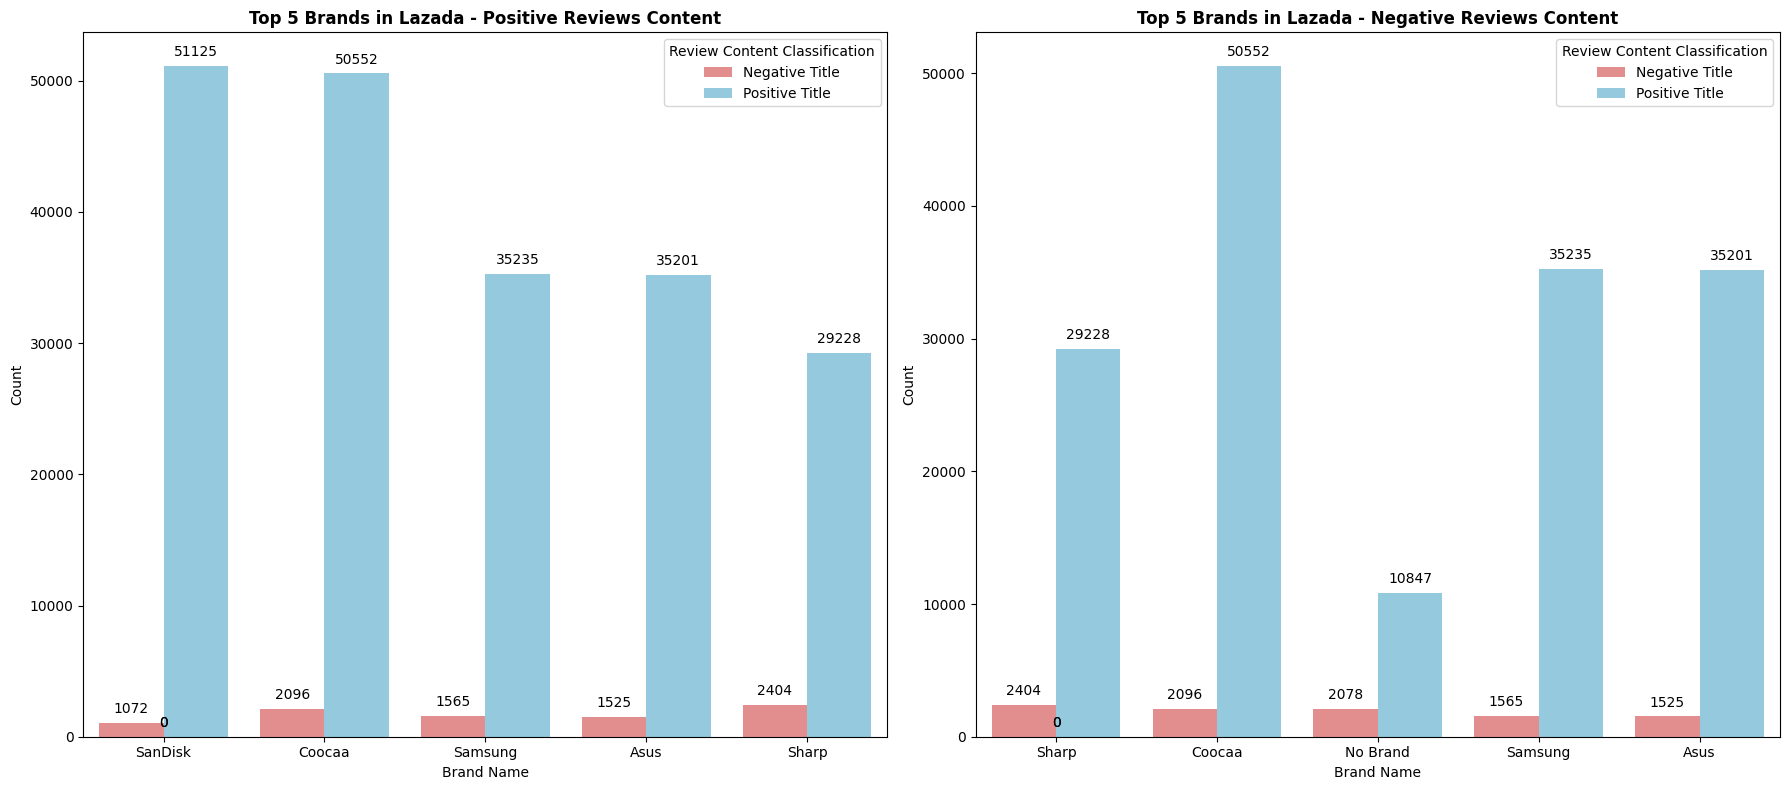

In [145]:
# Creating side-by-side subplots for positive and negative reviews
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Plotting positive reviews with annotations
sns.barplot(x='brandName', y='value', hue='Review Content Classification', data=melted_df_positive, 
            palette={'Positive Title': 'skyblue', 'Negative Title': 'lightcoral'}, ax=axes[0])
axes[0].set_title('Top 5 Brands in Lazada - Positive Reviews Content', fontweight='bold')  # Make title bold
axes[0].set_xlabel('Brand Name')
axes[0].set_ylabel('Count')
axes[0].legend(title='Review Content Classification')

# Adding annotations for positive reviews
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Plotting negative reviews with annotations
sns.barplot(x='brandName', y='value', hue='Review Content Classification', data=melted_df_negative, 
            palette={'Positive Title': 'skyblue', 'Negative Title': 'lightcoral'}, ax=axes[1])
axes[1].set_title('Top 5 Brands in Lazada - Negative Reviews Content', fontweight='bold')  # Make title bold
axes[1].set_xlabel('Brand Name')
axes[1].set_ylabel('Count')
axes[1].legend(title='Review Content Classification')

# Adding annotations for negative reviews
for p in axes[1].patches:
    axes[1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adjusting layout
plt.tight_layout()
plt.show()


**Two bar graphs comparing the positive and negative review content of the top 5 brands on Lazada. Here is my insight and summary of the image:**

1. The image shows that SanDisk and Cocacola have a significant number of positive review contents, while No Brand has an overwhelming amount of negative review contents. This could indicate that SanDisk and Cocacola have a high quality and customer satisfaction, while No Brand has a low quality and customer dissatisfaction.

2. Sharp, Samsung, and Asus have similar counts of positive and negative review contents, which could suggest that they have a balanced or mixed performance on Lazada. They may have some products that are well-received and some that are not, or they may have varying quality or service standards.

3. The conclusion of the image analysis is that SanDisk and Cocacola are the most popular and trusted brands on Lazada, while No Brand is the least popular and trusted brand. Sharp, Samsung, and Asus have a moderate performance and reputation on Lazada.

## **Top 10 Products - Heatmap of DownVotes Category**

In [61]:
# Grouping by 'shortened_name' and calculating the sum of 'downVotes'
downvotes_sum = df.groupby('shortened_name')[['downVotes']].sum()

# Sorting by the sum of 'downVotes' in descending order
downvotes_sum = downvotes_sum.sort_values(by='downVotes', ascending=False)

# Displaying the result
downvotes_sum.head()

,downVotes
shortened_name,
[GRATIS ONGKIR] COOCAA LED TV,47923
[GRATIS ONGKIR][Android 9.0 Ready] Xiaomi,1152
[GRATIS ONGKIR] Sharp 24 inch,288
Asus E203MAH-FD011T - Intel® Celeron®,150
Asus E202SA-FD113D - Intel Celeron,150


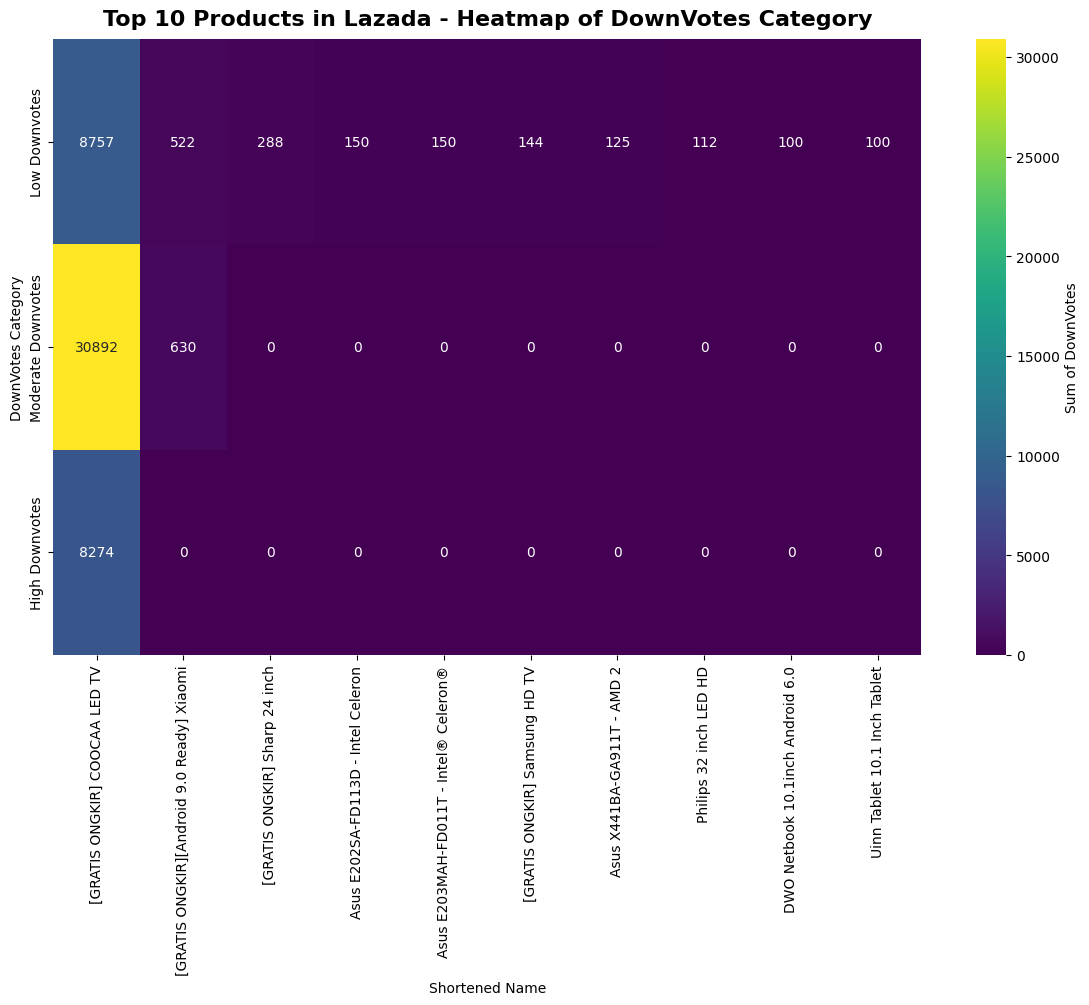

In [146]:
# Selecting the top 10 products based on the sum of downVotes
top_10_downvotes = downvotes_sum.head(10)

# Filtering the DataFrame to include only the top 10 products
df_top_10 = df[df['shortened_name'].isin(top_10_downvotes.index)]

# Pivot the DataFrame to create a heatmap
heatmap_data = df_top_10.pivot_table(index='downVotesCategory', columns='shortened_name', values='downVotes', aggfunc='sum', fill_value=0)

# Sorting columns by the sum of 'downVotes' in descending order
sorted_columns = heatmap_data.sum(axis=0).sort_values(ascending=False).index
heatmap_data = heatmap_data[sorted_columns]

# Creating a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d', cbar_kws={'label': 'Sum of DownVotes'})
plt.title('Top 10 Products in Lazada - Heatmap of DownVotes Category',size=16, pad=10, fontweight='bold')
plt.xlabel('Shortened Name')
plt.ylabel('DownVotes Category')
plt.show()


**a heatmap showing the downvotes for the top 10 products on Lazada. Here is my insight, summary, and suggestion for the image:**

1. The image shows that the product [GRATIS ONGKIR] COOCAA LED TV has received a significantly higher number of downvotes in the “Appearance & Color” category. This suggests that customers are largely dissatisfied with this aspect of the product. Lazada might consider looking into the  quality and description accuracy of this product, or potentially reviewing its listing on their platform.

2. The other products have relatively low numbers of downvotes in all categories, which could indicate that they have a better quality and customer satisfaction than [GRATIS ONGKIR] COOCAA LED TV. However, the image does not show the total number of reviews or the percentage of downvotes for each product, which could provide more context and comparison for the analysis.

3. The image uses a color scheme that ranges from purple to yellow to represent the sum of downvotes. 

A possible conclusion for Lazada based on the image is that they need to pay more attention to the appearance and color of their products, especially for generic or unbranded ones, as this could affect their customer satisfaction and reputation. They might also want to collect more data and feedback from their customers, and display them in a more clear and appealing way.

## **Top 10 Products - Heatmap of UpVotes Category**

In [96]:
# Grouping by 'shortened_name' and calculating the sum of 'upVotes'
upvotes_sum = df.groupby('shortened_name')[['upVotes']].sum()

# Sorting by the sum of 'upVotes' in descending order
upvotes_sum = upvotes_sum.sort_values(by='upVotes', ascending=False)

# Displaying the result
upvotes_sum.head()

,upVotes
shortened_name,
[GRATIS ONGKIR] COOCAA LED TV,67271
[GRATIS ONGKIR] Sharp 24 inch,33232
Philips 32 inch LED HD,18416
Asus E203MAH-FD011T - Intel® Celeron®,13050
[GRATIS ONGKIR][Android 9.0 Ready] Xiaomi,11319


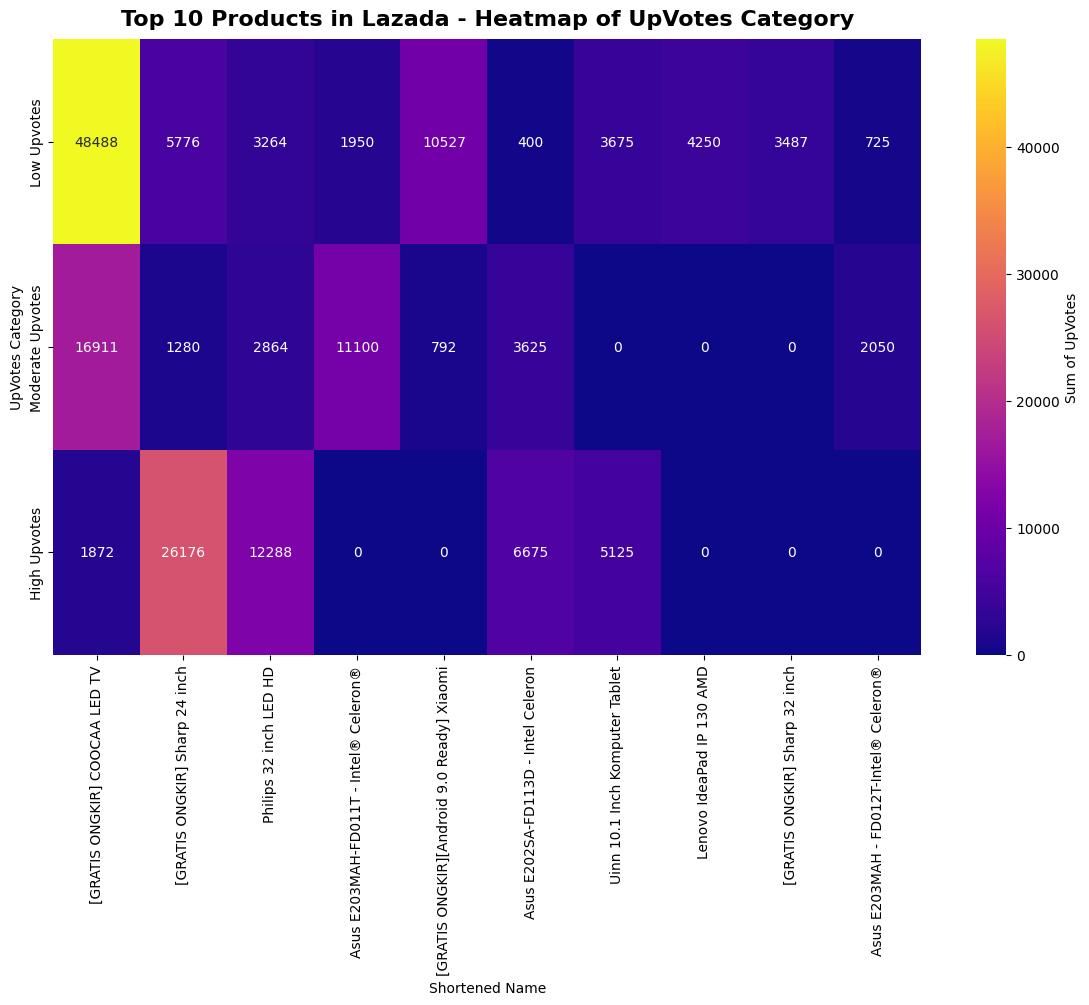

In [147]:
# Selecting the top 10 products based on the sum of upVotes
top_10_upvotes = upvotes_sum.head(10)

# Filtering the DataFrame to include only the top 10 products
df_top_10_upvotes = df[df['shortened_name'].isin(top_10_upvotes.index)]

# Pivot the DataFrame to create a heatmap
heatmap_data_upvotes = df_top_10_upvotes.pivot_table(index='upVotesCategory', columns='shortened_name', values='upVotes', aggfunc='sum', fill_value=0)

# Sorting columns by the sum of 'upVotes' in descending order
sorted_columns_upvotes = heatmap_data_upvotes.sum(axis=0).sort_values(ascending=False).index
heatmap_data_upvotes = heatmap_data_upvotes[sorted_columns_upvotes]

# Creating a heatmap with a different color map (cmap)
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data_upvotes, cmap='plasma', annot=True, fmt='d', cbar_kws={'label': 'Sum of UpVotes'})
plt.title('Top 10 Products in Lazada - Heatmap of UpVotes Category', size=16, pad=10, fontweight='bold')
plt.xlabel('Shortened Name')
plt.ylabel('UpVotes Category')
plt.show()

**a heatmap that visualizes the upvotes received by the top 10 products on Lazada in three different categories: low upvotes, moderate upvotes, and high upvotes.** 

The products are diverse, including electronics and home appliances. The color intensity represents the number of upvotes, with darker shades indicating higher votes. It appears that certain products have received significantly more attention and approval from customers than others.

Some insights and conclusions that can be drawn from the image are:

1. The product with the highest number of upvotes is [GRATIS ONGKIR] Sharp 24 inch, which has a dark blue cell. This suggests that this product is very popular and has a high customer satisfaction rate.

2. The product with the lowest number of upvotes is [GRATIS ONGKIR] COOCAA LED TV	, which has a light yellow cell. This indicates that this product is not very well-known or liked by customers.

3. The category with the most variation in upvotes is “High UpVotes”, which has products ranging from dark blue to light purple. This implies that there is a wide gap in quality and preference among the products in this category.

4. The category with the least variation in upvotes is “Low UpVotes”, which has products with mostly yellow cells. This means that there is not much difference in popularity and feedback among the products in this category.

5. The products with moderate upvotes are mostly home appliances, such as washers, dryers, air conditioners, and vacuum cleaners. This could indicate that these products are essential and reliable, but not very exciting or innovative.

## **Top 10 Products - Heatmap of LikeCount Category**

In [105]:
# Grouping by 'shortened_name' and calculating the sum of 'likeCount'
likecount_sum = df.groupby('shortened_name')[['likeCount']].sum()

# Sorting by the sum of 'likeCount' in descending order
likecount_sum = likecount_sum.sort_values(by='likeCount', ascending=False)

# Displaying the result
likecount_sum.head()

,likeCount
shortened_name,
[GRATIS ONGKIR] COOCAA LED TV,67271
[GRATIS ONGKIR] Sharp 24 inch,33232
Philips 32 inch LED HD,18416
Asus E203MAH-FD011T - Intel® Celeron®,13050
[GRATIS ONGKIR][Android 9.0 Ready] Xiaomi,11319


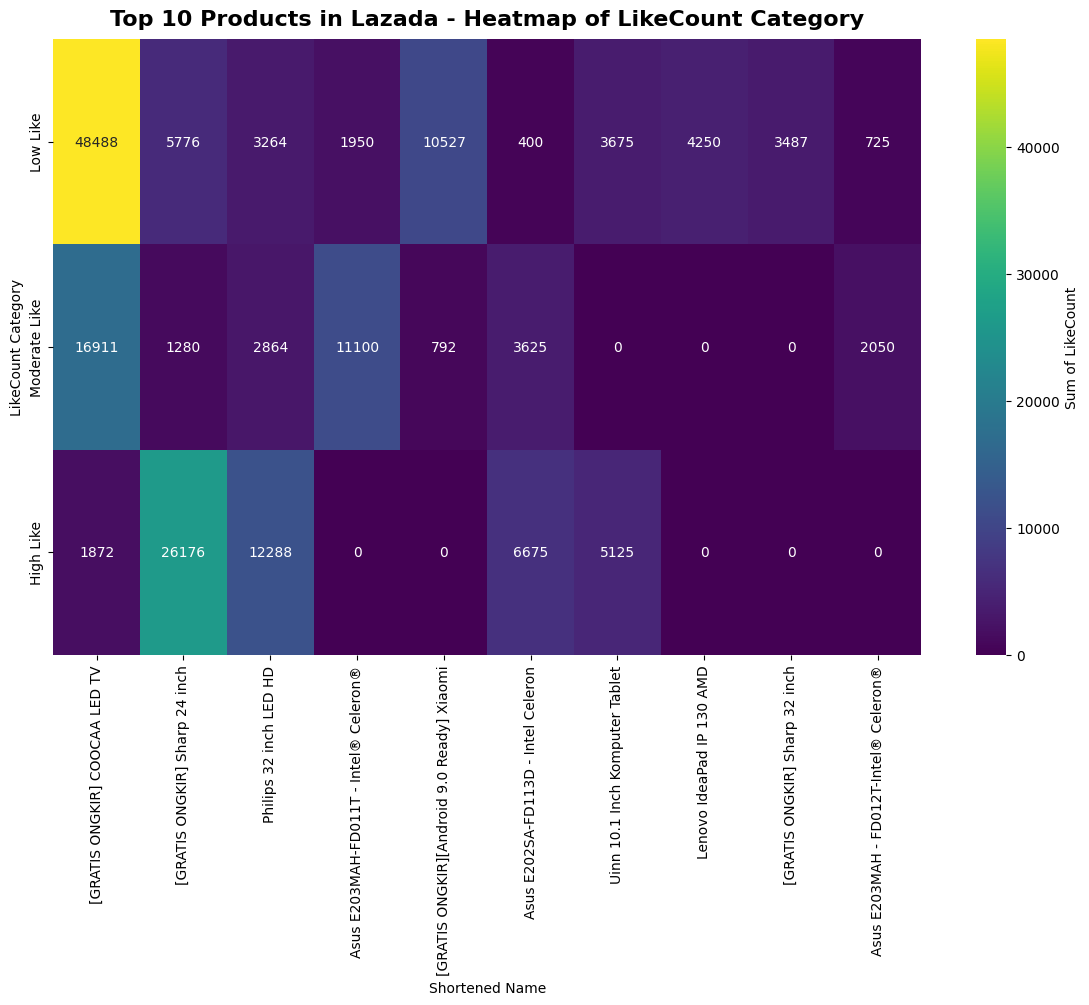

In [148]:
# Selecting the top 10 products based on the sum of likeCount
top_10_likecount = likecount_sum.head(10)

# Filtering the DataFrame to include only the top 10 products
df_top_10_likecount = df[df['shortened_name'].isin(top_10_likecount.index)]

# Pivot the DataFrame to create a heatmap
heatmap_data_likecount = df_top_10_likecount.pivot_table(index='likeCountCategory', columns='shortened_name', values='likeCount', aggfunc='sum', fill_value=0)

# Sorting columns by the sum of 'likeCount' in descending order
sorted_columns_likecount = heatmap_data_likecount.sum(axis=0).sort_values(ascending=False).index
heatmap_data_likecount = heatmap_data_likecount[sorted_columns_likecount]

# Creating a heatmap with a different color map (cmap)
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data_likecount, cmap='viridis', annot=True, fmt='d', cbar_kws={'label': 'Sum of LikeCount'})
plt.title('Top 10 Products in Lazada - Heatmap of LikeCount Category', size=16, pad=10, fontweight='bold')
plt.xlabel('Shortened Name')
plt.ylabel('LikeCount Category')
plt.show()


**a heatmap that visualizes the like counts for the top 10 products on Lazada in three different categories: low likes, intermediate likes, and high likes. The products are diverse, including electronics and home appliances.**

The color intensity represents the number of likes, with darker shades indicating higher likes. It appears that certain products have received significantly more attention and approval from customers than others.

Some insights and conclusions that can be drawn from the image are:

1. The product with the highest number of likes is [GRATIS ONGKIR] Sharp 24 inch, which has a green cell. This suggests that this product is very popular and has a high customer satisfaction rate.

2. The product with the lowest number of likes is [GRATIS ONGKIR] COOCAA LED TV, which has a light yellow cell. This indicates that this product is not very well-known or liked by customers.

3. The category with the most variation in likes is “High Likes”, which has products ranging from dark purple to light purple. This implies that there is a wide gap in quality and preference among the products in this category.

4. The category with the least variation in likes is “Low Likes”, which has products with mostly yellow cells. This means that there is not much difference in popularity and feedback among the products in this category.

5. The products with intermediate likes are mostly home appliances, such as washers, dryers, air conditioners, and vacuum cleaners. This could indicate that these products are essential and reliable, but not very exciting or innovative.

### **[GRATIS ONGKIR] COOCAA LED TV has the Most Negative overall Review based on many aspect above**

In [126]:
df_coo = df[df["shortened_name"] == "[GRATIS ONGKIR] COOCAA LED TV"]


In [132]:
# Filter rows where 'reviewContentCategory' is 'Not Recommended'
df_coo_not_recommended = df_coo[df_coo['Sentiment'] == 'Not recommended']

# Sort the DataFrame by 'reviewContentCategory' in descending order
df_coo_not_recommended_sorted = df_coo_not_recommended.sort_values(by='Sentiment', ascending=False)

# Display only the specified columns for the top 10 rows
df_coo_not_recommended_sorted[['shortened_name', 'reviewContent', 'reviewTitle']].head(30)

,shortened_name,reviewContent,reviewTitle
301822,[GRATIS ONGKIR] COOCAA LED TV,"maaf bru diulas krna Bru datang Antena Toyosaki nya hari ni sebelumnya sudah ditest pas dteng pke antena tetangga kost an, gmbarnya berbayang saya pkir krna antena untuk tv biasa jdi hrus pake antena khusus led..nah skrng sudah pakai antena yg bagus knp msh berbayang jga ya ? pdhal udh pake antena yg bagus .. pleass respon seller.. dan lazadaa.. saya sangatt kecewa x ini beli coocaa..pdhal sblmnya beli coocaa 40inc baik2 saja sampai rumah..thanks ditunggu blsanha",Not Recommended
379041,[GRATIS ONGKIR] COOCAA LED TV,kok datang posisi barang pecah bgini. gimana solusinya ini,Not Recommended
379178,[GRATIS ONGKIR] COOCAA LED TV,saya kecewa barang yg dikirim tidak sesuai. proses pengembaliannya ribet perihal berat di sistem berbeda dengan timabngan.mohon solusi dari pihak lazada,Not Recommended
379151,[GRATIS ONGKIR] COOCAA LED TV,"untuk kali ini barang harus di refund karena tidak berfungsi, tdk bs mencari saluran analog n digital, mungkin sblm dikirim konsumen bisa dicek terlebih dahulu, baru pernah beli di lazada mall barang mengecewakan, smoga dana refund cepat kembali........... update 10/4 dana refund kembali dengan cepat",Not Recommended
379133,[GRATIS ONGKIR] COOCAA LED TV,khusus beli di 11nov di keterangan tertulis include free vvip card. mana vvip cardnya? Saya buka kotak tvnya tidak ada vvip cardnya. Tolong dikirim lagi vvip cardnya..,Not Recommended
379131,[GRATIS ONGKIR] COOCAA LED TV,kecewa !! remotenya baru sehari di pakai lgsg rusak.. blm dpt e vipnya. gmn cr retur remotenya? tlg sgera bantu untuk tukar dgn remote yg baruu.... saya d bekasi. daerah mana paling cpt dan ready stock untuk tukar dgn remote yg baruu ?!!!!!!!,Not Recommended
379067,[GRATIS ONGKIR] COOCAA LED TV,kondisi tv nya layar bagian atas renggang. kaya lem nya lepas. mohon dibantu. komplainnya kemana?,Not Recommended
379061,[GRATIS ONGKIR] COOCAA LED TV,"parah barang baru datang pake ninja van , tidak dipacking kayu , layar pecah parah , pas mau dikembalikan pakai j&t dikenakan biaya packing kayu",Not Recommended
379057,[GRATIS ONGKIR] COOCAA LED TV,tvnya rusak masa eror gini setelan tv ga bsa gimana nih mana ga ada buku garansi gimana,Not Recommended
379054,[GRATIS ONGKIR] COOCAA LED TV,kirim hy pakai bubletrap..layar pecah,Not Recommended


**It seems that many customers are complaining about Coocaa products on Lazada for various reasons. Some of the common issues are:**

1. The product arrived damaged, broken, or cracked, especially the screen. This could be due to poor packaging, careless handling, or rough transportation. Some customers mentioned that the product was not packed with wood or bubble wrap, and was delivered by motorbike instead of car3 .

2. The product did not function properly, such as not being able to search for analog or digital channels, not being able to turn on, or having remote control problems. This could be due to defective or faulty products, or lack of quality control before shipment. Some customers also complained that there was no warranty book or VIP card included in the package .

3. The product did not match the description, specification, or expectation. This could be due to misleading or inaccurate information, or lack of communication between the seller and the buyer. Some customers also expressed dissatisfaction with the VIP card offer, which was either not delivered or delayed .

4. The return or refund process was complicated, time-consuming, or costly. This could be due to the seller’s or Lazada’s policies, procedures, or systems. Some customers also encountered problems with the delivery service, such as being charged for packing wood, or receiving the wrong product .

**A summary of the customer complaints for Coocaa products on Lazada is:**

A. Many customers are unhappy with Coocaa products on Lazada because they received damaged, defective, or mismatched products, and faced difficulties in returning or refunding them.

B. The main causes of the complaints are poor packaging, careless handling, rough transportation, defective or faulty products, lack of quality control, misleading or inaccurate information, lack of communication, complicated or costly policies, procedures, or systems, and problems with the delivery service.

C. The main consequences of the complaints are customer dissatisfaction, frustration, anger, disappointment, and loss of trust.

## **ScatterPlot for All Numerical Columns**

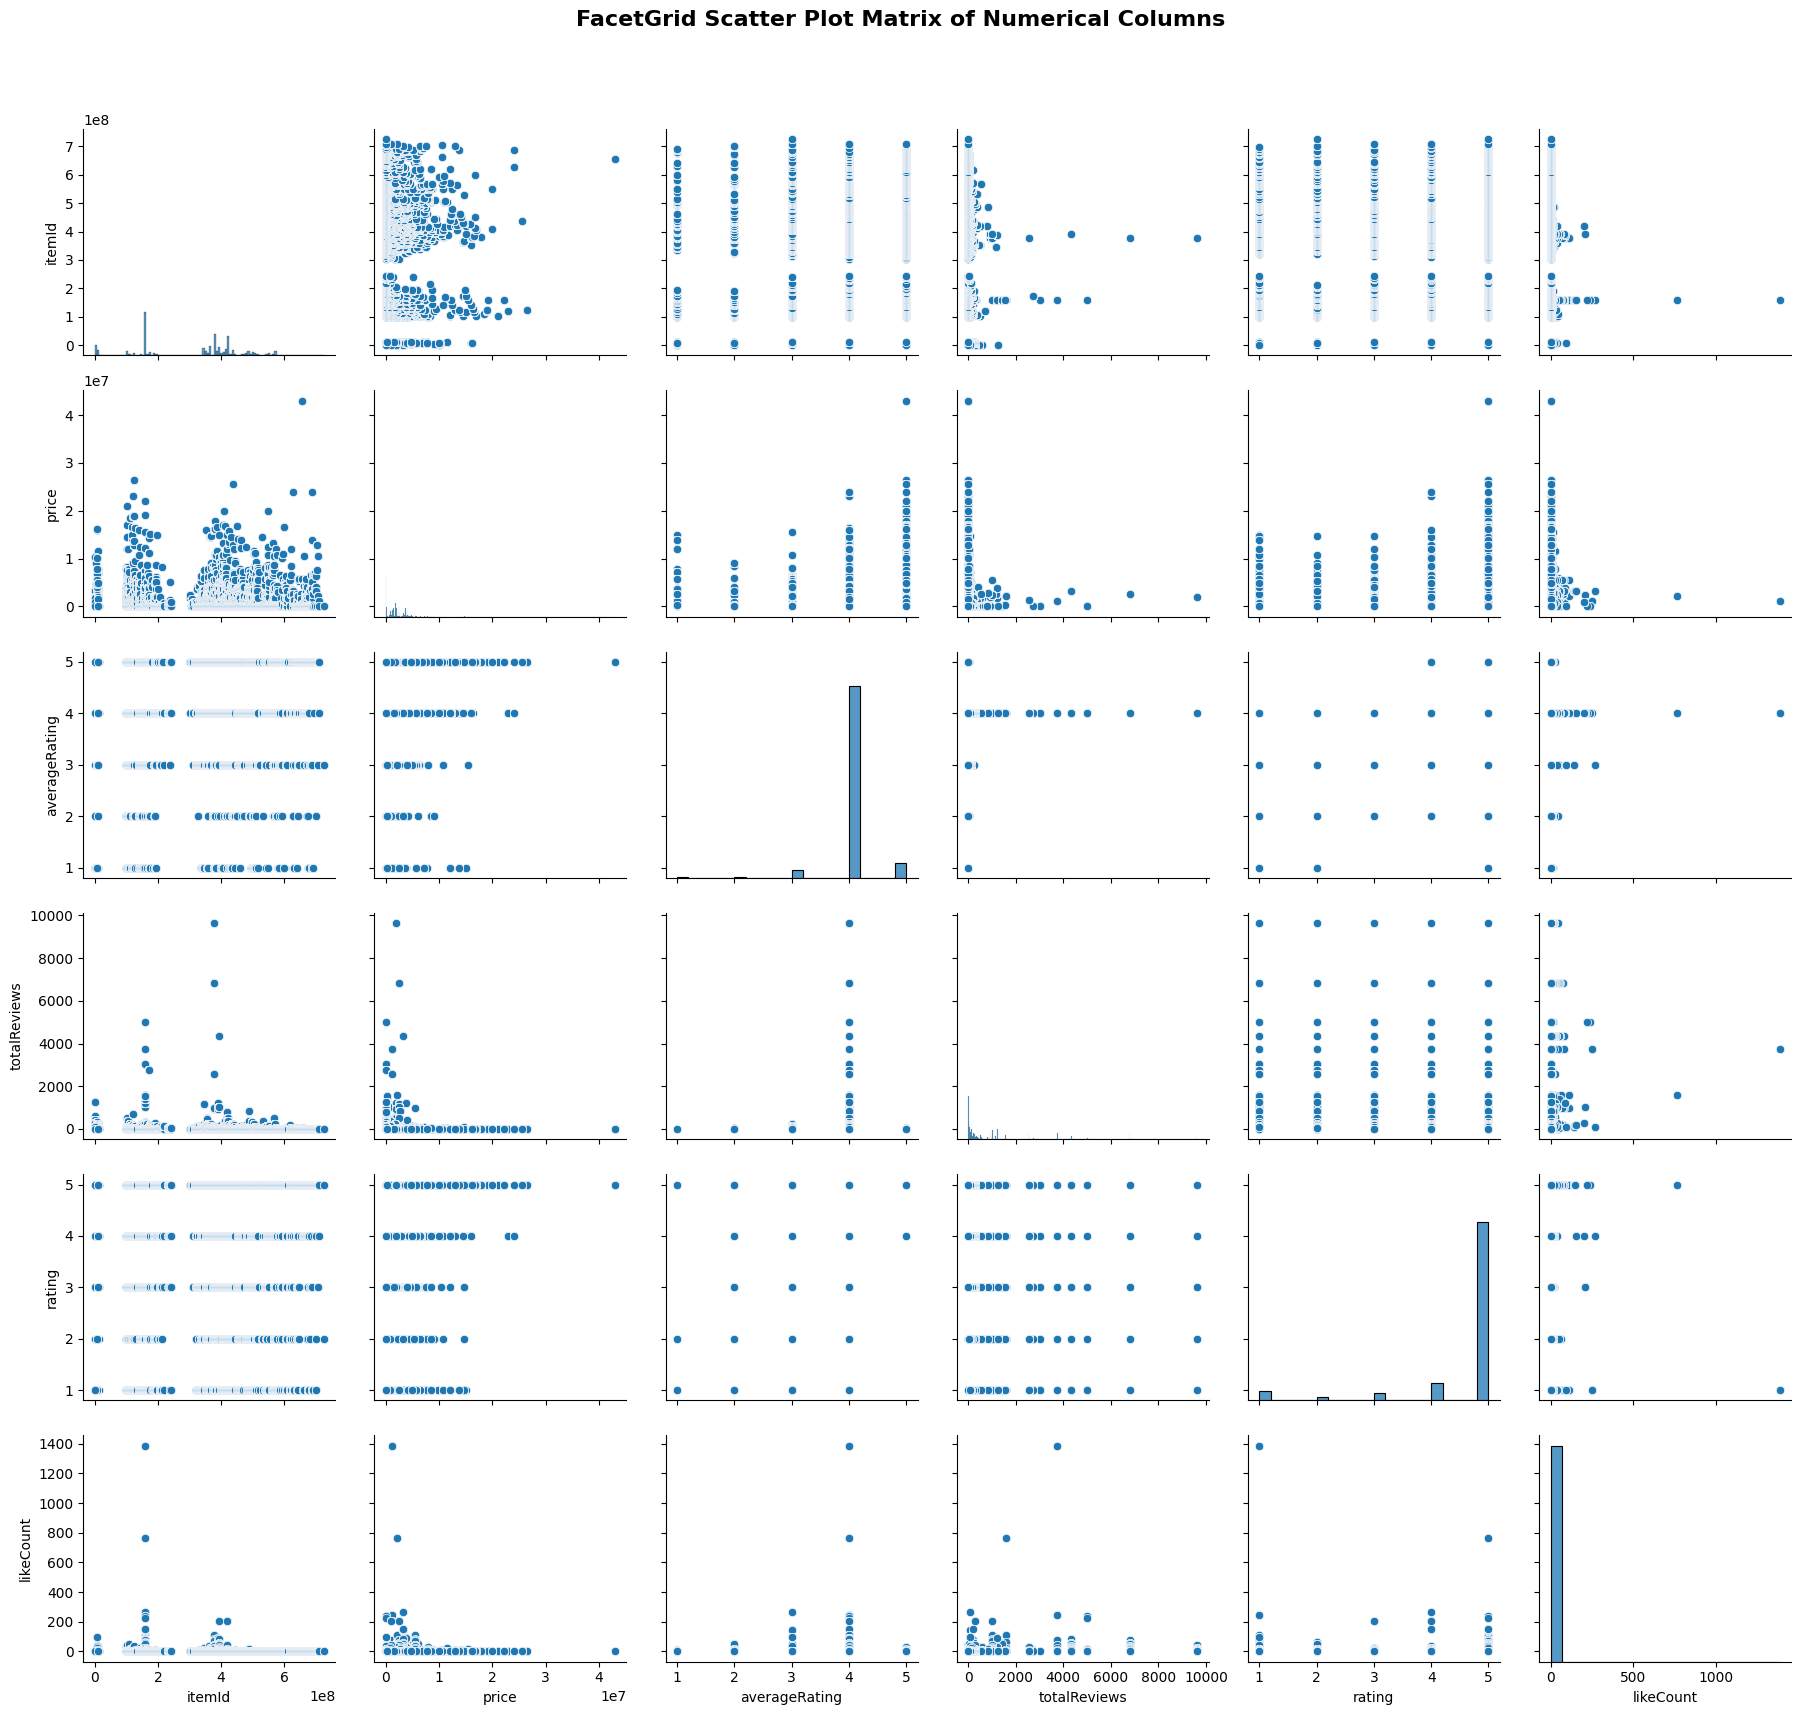

In [88]:
# Filter only numerical columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Choose a subset of columns for demonstration
subset_columns = numeric_columns[:6]  # Adjust based on your preference

# Create a FacetGrid with scatter plots
g = sns.PairGrid(df, vars=subset_columns, height=3)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

# Adjust layout to make space for the title
plt.suptitle('FacetGrid Scatter Plot Matrix of Numerical Columns', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the top parameter

plt.show()

**FacetGrid scatter plot matrix of numerical columns**. 

It displays multiple scatter plots arranged in a grid format, each representing relationships between different pairs of numerical variables. The x and y axes labels are not clearly visible; hence it is difficult to identify which specific variables are being compared. Each cell in the grid shows a scatter plot that represents the correlation or relationship between two numerical variables. The diagonal line from top left to bottom right appears to have histograms or bar graphs showing the distribution of individual variables.

**Some insights and conclusions that can be drawn from the image are:**

1. The image does not provide enough information to analyze the correlation between each column in Lazada review data. The labels of the variables are missing, the scale of the axes are unclear, and the data points are too dense to see any patterns or trends. A better way to visualize the correlation would be to use a correlation matrix with a color map, or to plot each pair of variables separately with appropriate labels and scales.

2. The image does not show any obvious linear or nonlinear relationships between the numerical variables. Most of the scatter plots appear to be random or clustered around a single value. This could indicate that the variables are independent or weakly correlated, or that there are other factors that influence the relationship. A possible way to explore the relationship further would be to use statistical tests such as Pearson’s correlation coefficient or Spearman’s rank correlation coefficient, or to perform a regression analysis with different models and assumptions.

3. The image shows some interesting distributions of the individual variables. For example, the histogram of the averageRating variable shows that most of the products have a rating of 4 or 5, indicating a positive feedback from the customers. The histogram of the totalReviews variable shows that most of the products have a low number of reviews, indicating a low popularity or exposure. The histogram of the price variable shows that most of the products have a price below 10 million rupiah, indicating a low to medium range of prices.

## **Correlation Between Numerical Columns**

,itemId,price,averageRating,totalReviews,rating,likeCount,upVotes,downVotes,relevanceScore
itemId,1.000000,0.125729,0.119232,-0.151308,0.061338,-0.026858,-0.026858,0.017947,0.299604
price,0.125729,1.000000,0.192264,-0.034722,0.059690,0.143695,0.143695,0.065627,0.148626
averageRating,0.119232,0.192264,1.000000,-0.160103,0.235988,-0.030119,-0.030119,-0.010794,0.039867
totalReviews,-0.151308,-0.034722,-0.160103,1.000000,0.036619,0.064074,0.064074,0.108576,0.190323
rating,0.061338,0.059690,0.235988,0.036619,1.000000,-0.100159,-0.100159,-0.047536,-0.030960
likeCount,-0.026858,0.143695,-0.030119,0.064074,-0.100159,1.000000,1.000000,0.223489,0.268218
upVotes,-0.026858,0.143695,-0.030119,0.064074,-0.100159,1.000000,1.000000,0.223489,0.268218
downVotes,0.017947,0.065627,-0.010794,0.108576,-0.047536,0.223489,0.223489,1.000000,0.126544
relevanceScore,0.299604,0.148626,0.039867,0.190323,-0.030960,0.268218,0.268218,0.126544,1.000000


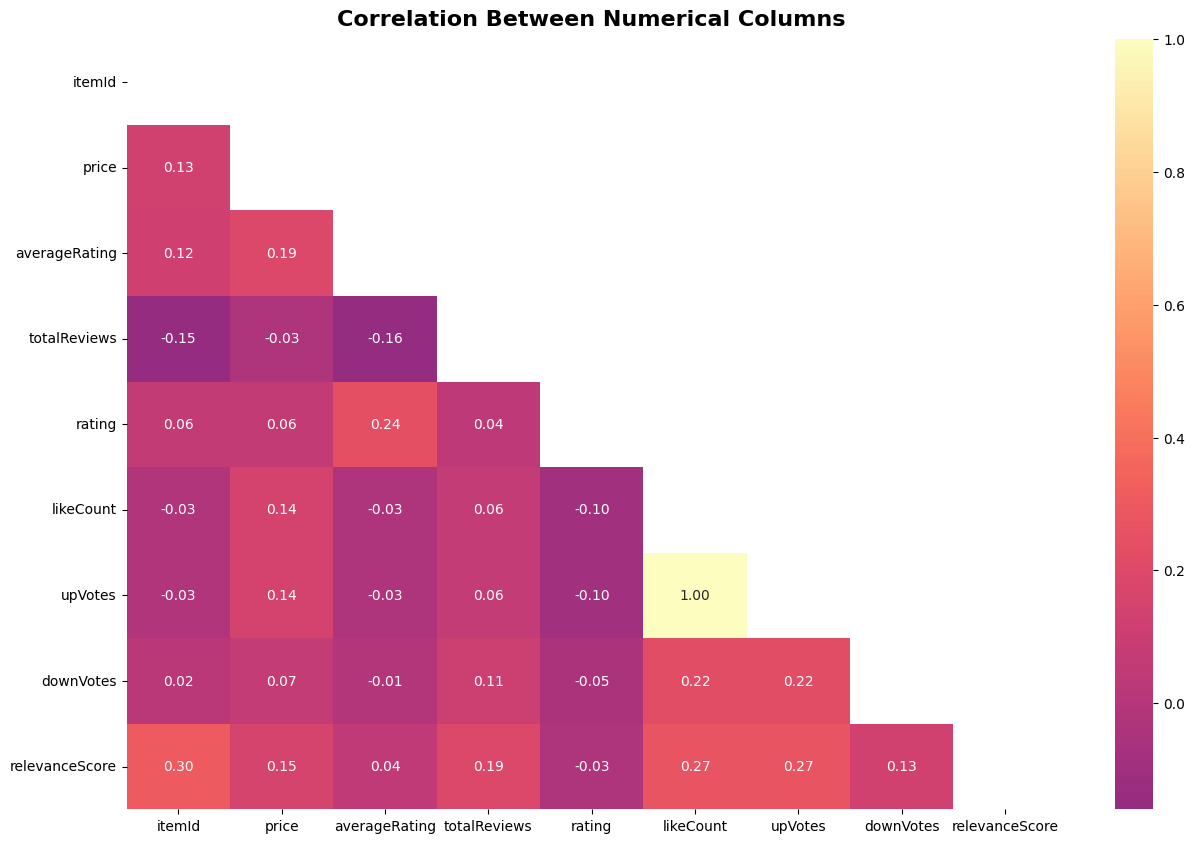

In [93]:
numerical_col = df.select_dtypes(include=['float64', 'int64']).columns
correlation = df[numerical_col].corr(method = "spearman")
matriks = np.triu(correlation)
display(correlation)

plt.figure(figsize = (15, 10))
sns.heatmap(
    data = correlation,
    annot = True,
    fmt = ".2f",
    cmap = "magma",
    center = 0,
    mask = matriks
)

plt.title("Correlation Between Numerical Columns", size=16, pad=10, fontweight='bold')
plt.show()

**a heatmap titled “Correlation Between Numerical Columns.” It displays the correlation coefficients between pairs of variables: itemId, price, averageRating, totalReviews, rating, likeCount, upVotes, downVotes and relevanceScore.**

The correlation coefficients are represented by colors ranging from dark purple (indicating a low correlation) to yellow (indicating a high positive correlation). Most of the cells are dark purple indicating low correlation values. There is a strong positive correlation (yellow cell) between upVotes and itself as expected. Some moderate positive correlations exist; for example between rating and totalReviews (0.24), and relevanceScore with price (0.30) and rating (0.27).

**Some insights and conclusions that can be drawn from the image are:**

1. The image shows the relationship between different numerical columns from Lazada review data, such as itemId, price, averageRating, totalReviews, rating, likeCount, upVotes, downVotes and relevanceScore. These columns could represent various aspects of the products and customers’ feedback on Lazada’s platform.

2. The image does not show any strong or significant correlations between most of the variables, except for upVotes with itself. This could mean that the variables are independent or weakly related, or that there are other factors that influence the relationship. A possible way to explore the relationship further would be to use statistical tests or regression models with different assumptions and controls.

3. The image shows some moderate positive correlations between some variables, such as rating and totalReviews, and relevanceScore with price and rating. This could imply that there is some association or influence between these variables. For example, products with higher ratings could attract more reviews, and products with higher prices and ratings could have higher relevance scores. However, these correlations do not imply causation, and could be affected by confounding variables or reverse causality.

## **Correlation of Numerical columns with Price**

In [110]:
numeric_columns = ['itemId', 'price',
       'averageRating', 'totalReviews', 'rating', 'likeCount',
       'upVotes', 'downVotes', 'relevanceScore']
# Select numeric columns from DataFrame
data = df[numeric_columns]

# Handling missing values by dropping rows with any missing values
data = data.dropna()

# Calculate correlation matrix
correlation_matrix = data.corr(method='spearman')

# Define function to assess correlation strength
def assess_correlation(correlation):
    kuatKorelasi_dict = {
        (0, 0.2): "sangat lemah (very weak)",
        (0.2, 0.4): "lemah (weak correlation)",
        (0.4, 0.6): "sedang (moderate correlation)",
        (0.6, 0.9): "kuat (strong correlation)",
        (0.9, 1): "sangat kuat (very strong correlation)"
    }

    result = []

    for col in correlation.columns:
        for i, kuat in kuatKorelasi_dict.items():
            corr_value = correlation.loc[col, 'price']
            if i[0] <= abs(corr_value) <= i[1]:
                kuatKorelasi = kuat
                break

        arahKorelasi = "positif" if corr_value > 0 else "negatif" if corr_value < 0 else "netral"

        result.append([col, round(corr_value, 5), kuatKorelasi, arahKorelasi])

    df_result = pd.DataFrame(result, columns=['Column', 'Correlation', 'Strength', 'Direction'])
    df_result.set_index('Column', inplace=True)

    return df_result

# Test the function
result_df = assess_correlation(correlation_matrix)


print('\033[4mCORRELATION SUMMARY BY price\033[0m')
result_df

CORRELATION SUMMARY BY price


,Correlation,Strength,Direction
Column,,,
itemId,0.12573,sangat lemah (very weak),positif
price,1.00000,sangat kuat (very strong correlation),positif
averageRating,0.19226,sangat lemah (very weak),positif
totalReviews,-0.03472,sangat lemah (very weak),negatif
rating,0.05969,sangat lemah (very weak),positif
likeCount,0.14369,sangat lemah (very weak),positif
upVotes,0.14369,sangat lemah (very weak),positif
downVotes,0.06563,sangat lemah (very weak),positif
relevanceScore,0.14863,sangat lemah (very weak),positif


## **Save the cleaned dataframe to a new Excel file**

In [149]:
df.to_excel('Cleaned Lazada-Data.xlsx', index=False)

## **Conclusion Overall**
<img src = 'https://img.alicdn.com/imgextra/i2/O1CN01NVg7CY28nyeFAwvXA_!!6000000007978-2-tps-780-439.png'>


**The products on Lazada have different levels of popularity and quality, as reflected by the number of upvotes and downvotes they receive from customers.**

1. The products with high upvotes tend to be branded and well-known, such as Sharp, Samsung, and LG, while the products with low upvotes tend to be generic and unbranded, such as COOCAA and Midea.

2. The products with high downvotes usually have issues with their appearance and color, which could indicate a mismatch between the product description and the actual product delivered.

3. The products with moderate upvotes and downvotes are mostly home appliances that are functional and dependable, but not very attractive or innovative.



## **Conclusion for CooCaa Products who have the most not recommended or negative reviews**

1. Coocaa products have the most negative sentiment, upvotes, downvotes, and like counts among the top 10 products on Lazada, according to the heatmap. This indicates that Coocaa products are not well-received by the customers, and have a low quality and reputation.

2. The main reasons for the negative feedback are the poor packaging, handling, and transportation of the products, which result in damage, breakage, or cracking of the screens. Additionally, the products are defective, faulty, or mismatched, and do not function properly or meet the customers’ expectations. Furthermore, the return or refund process is complicated, time-consuming, or costly, and the delivery service is problematic.

3. The main impacts of the negative feedback are the customer dissatisfaction, frustration, anger, disappointment, and loss of trust. These could affect the sales, revenue, and market share of Lazada and Coocaa, as well as their brand image and loyalty. Moreover, the negative feedback could also influence the ratings, reviews, and relevance scores of the products, which could affect their visibility and attractiveness on the platform.

## **Recommendation for Lazada Overall**

**A possible recommendation for Lazada based on the conclusion is:**

1. To improve their customer satisfaction and reputation, Lazada should monitor and review the products that receive high downvotes, especially in the appearance and color category, and ensure that they meet the quality standards and expectations of the customers.

2. To increase their sales and revenue, Lazada should promote and highlight the products that receive high upvotes, especially in the categories that are relevant and appealing to the customers, such as performance and features.

3. To diversify their product portfolio and attract more customers, Lazada should introduce and showcase more products that are creative and unique, such as smart devices, gaming consoles, and wearable gadgets.

4. To improve their customer satisfaction and reputation, Lazada  should improve their packaging, handling, and transportation of the products, and ensure that they are protected from damage, breakage, or cracking. They should also check the quality and functionality of the products before shipment, and provide warranty books and VIP cards to the customers.

5. To resolve the customer complaints and issues, Lazada  should simplify and expedite their return or refund process, and provide clear and accurate information and communication to the customers. They should also address the problems with the delivery service, such as the charges for packing wood, or the delivery of the wrong products.

6. To increase their sales and revenue, Lazada  should update and enhance their product description, specification, and expectation, and avoid misleading or inaccurate information. They should also offer more incentives and discounts to the customers, such as free shipping, coupons, or vouchers.